In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'MFEB.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

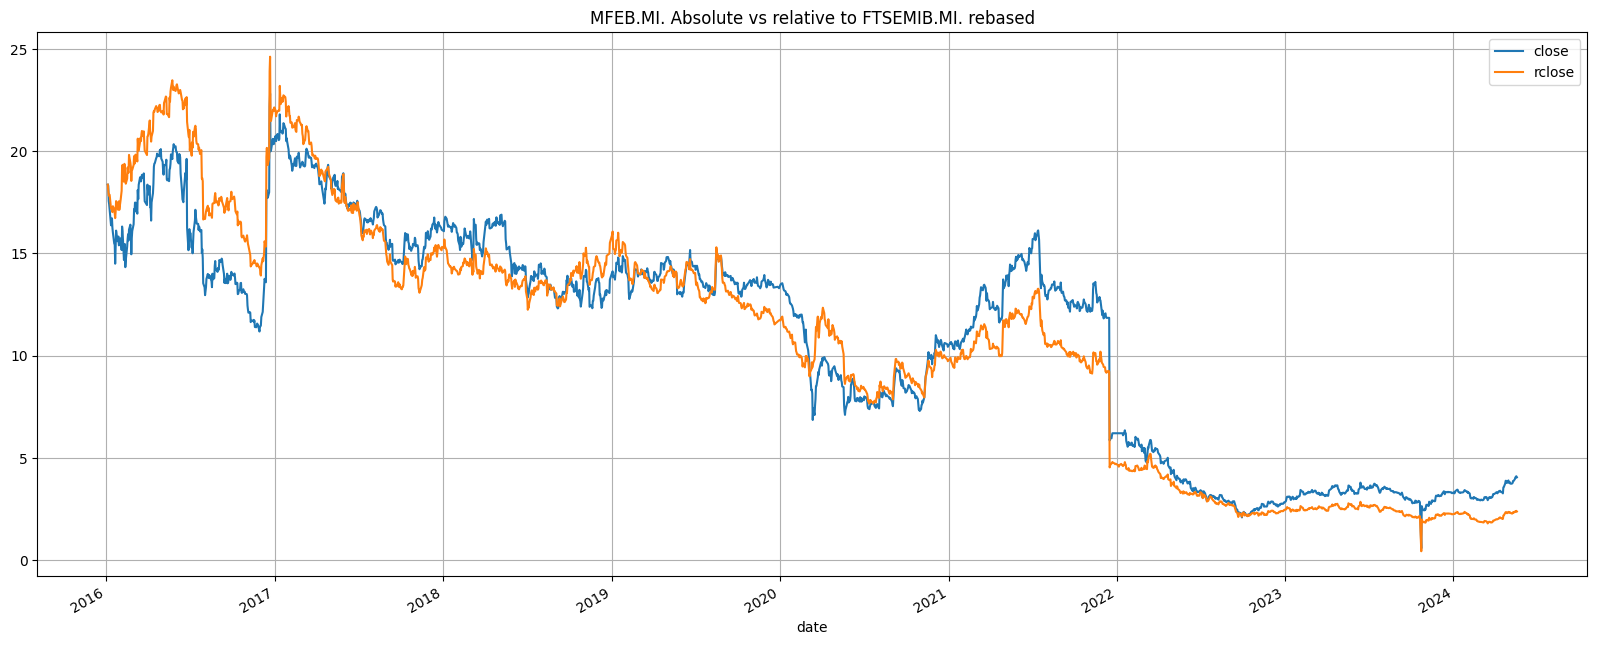

In [3]:
plot_abs_rel(df, ticker, bm_df, bm_name)

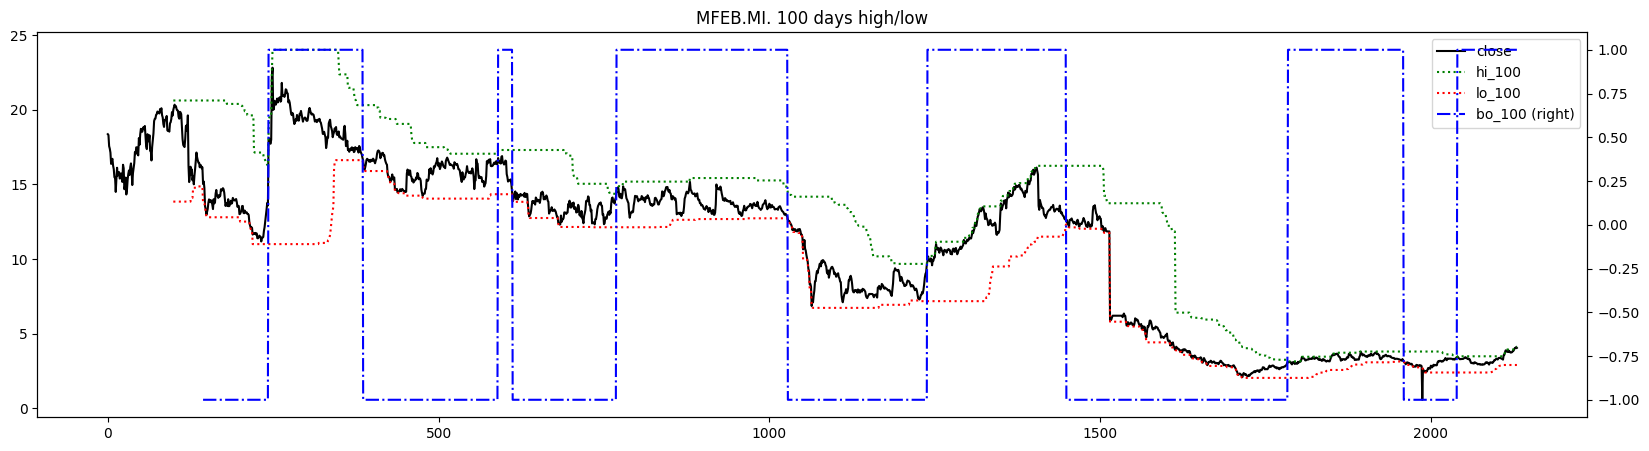

In [4]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

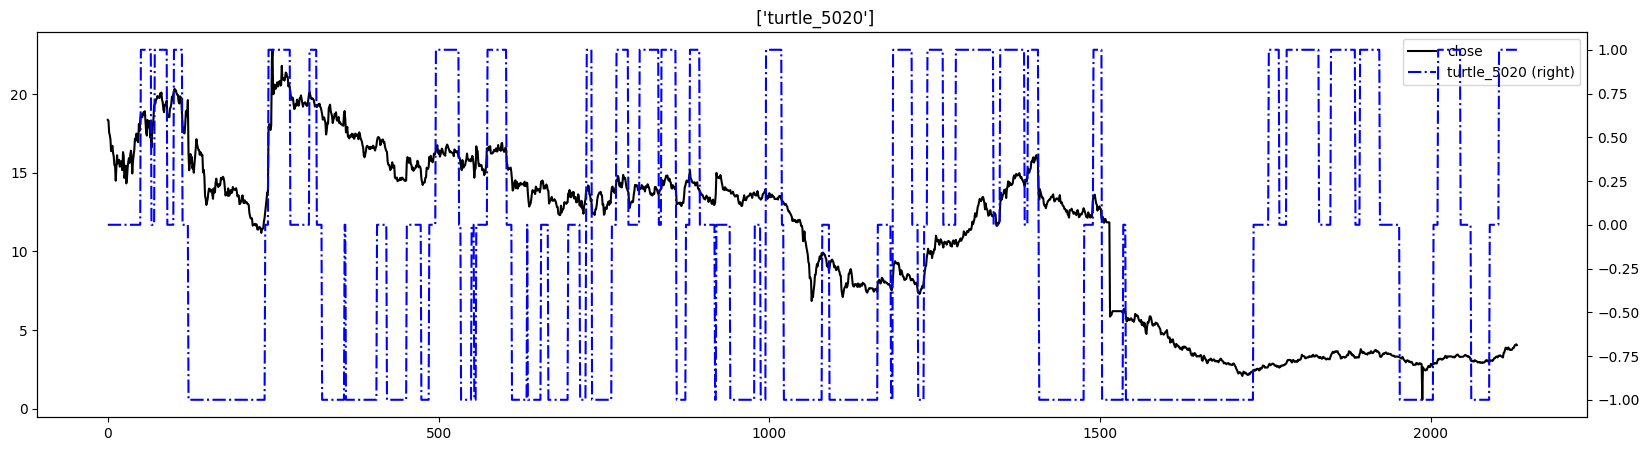

In [5]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

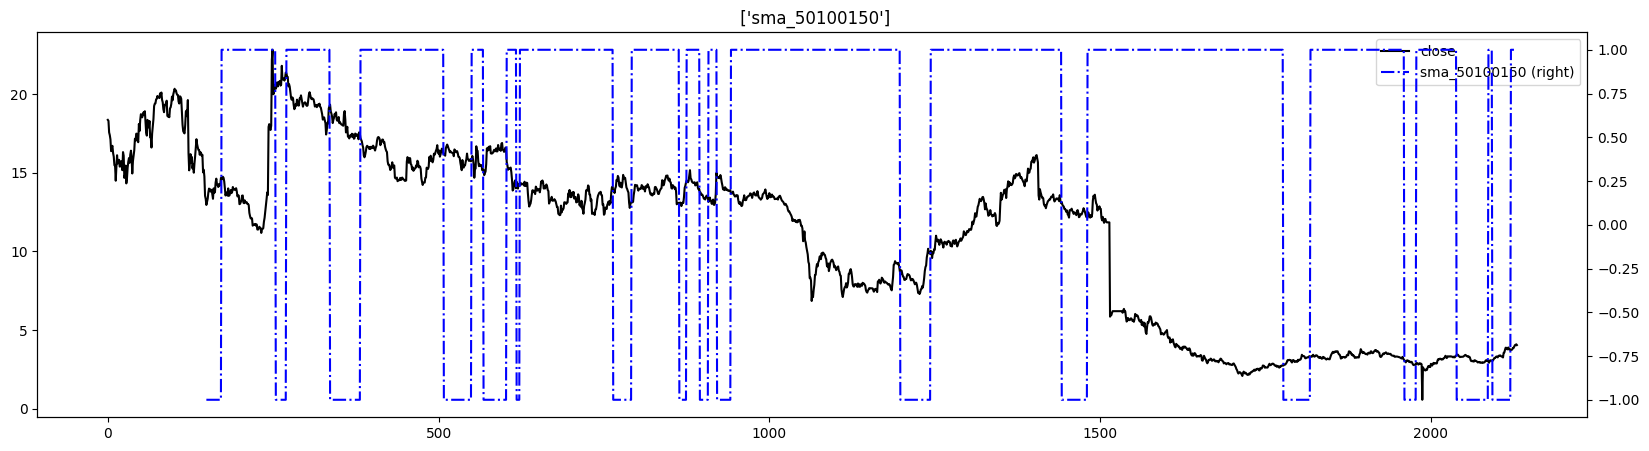

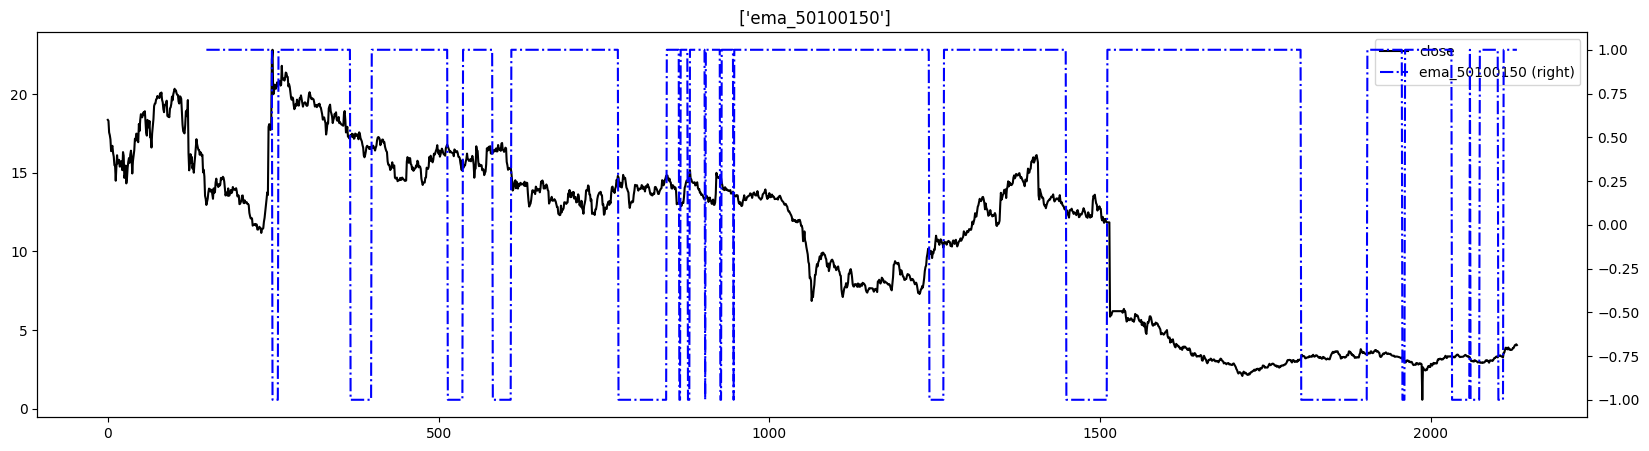

In [6]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

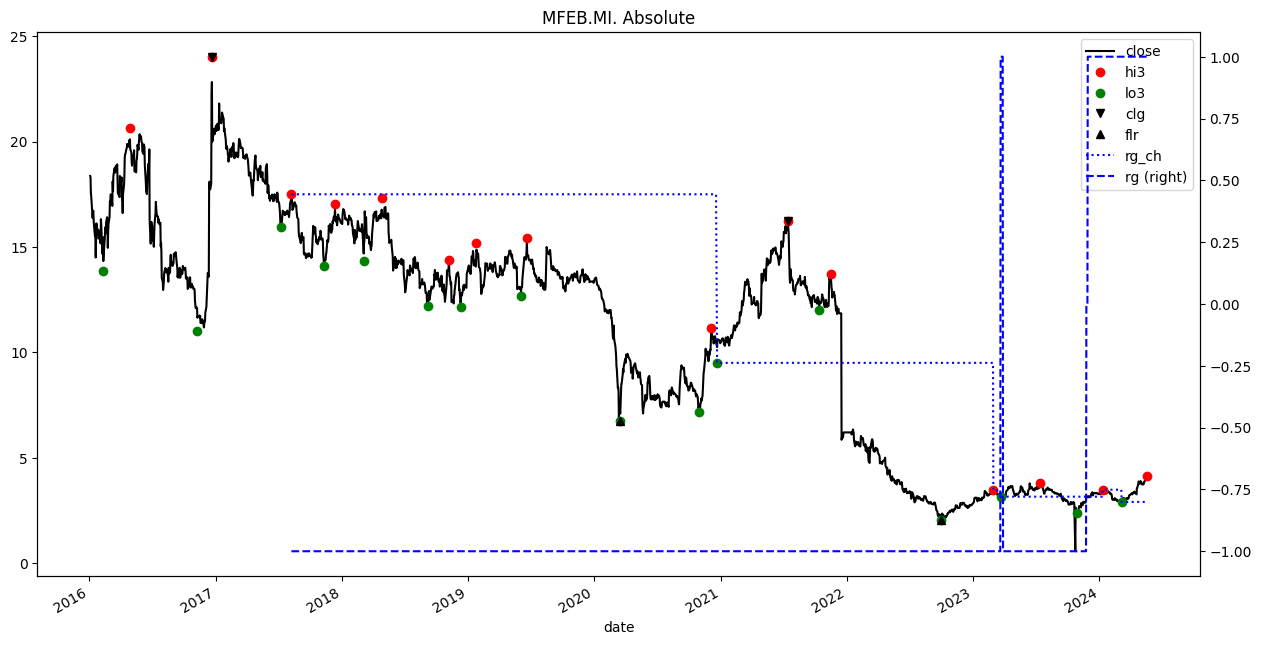

In [7]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


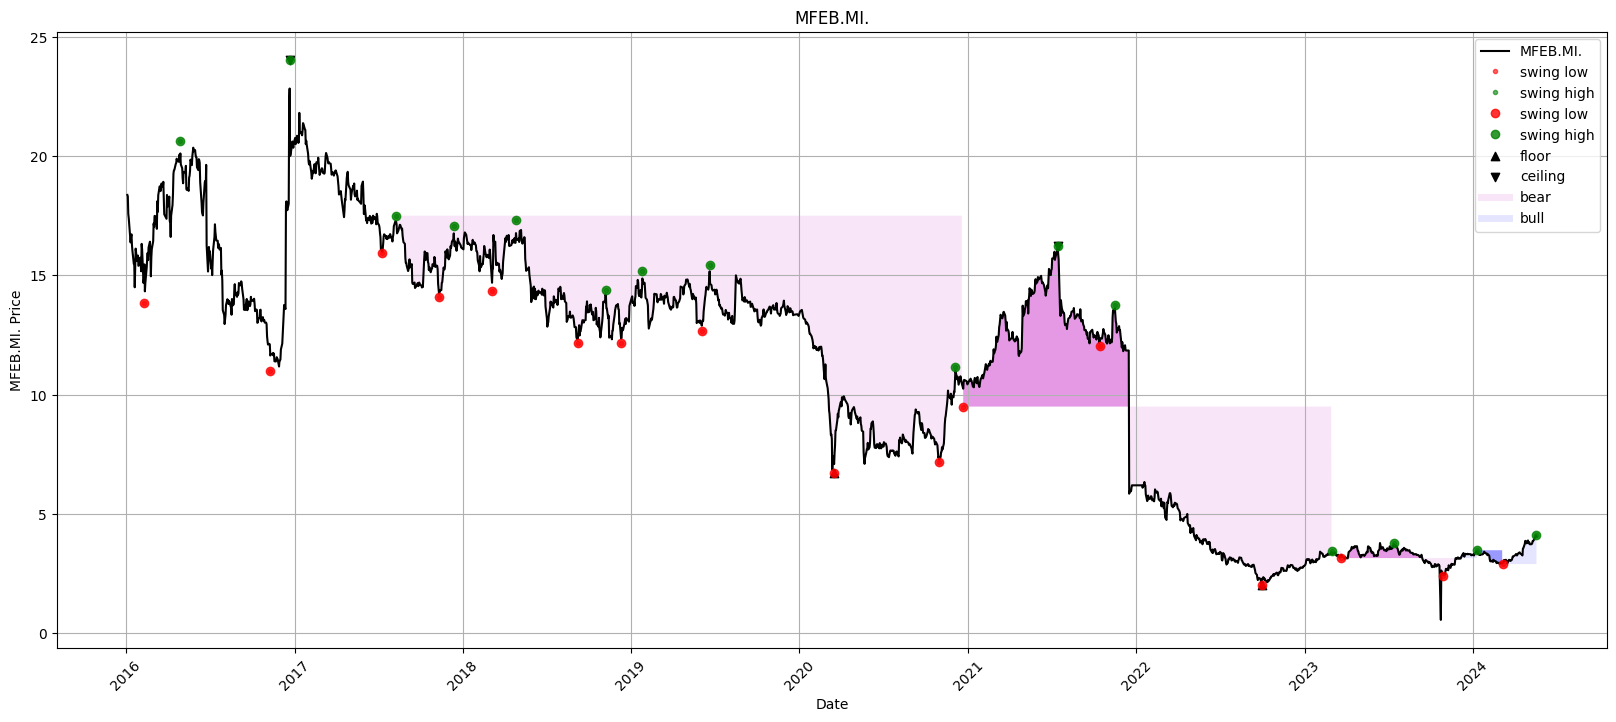

In [8]:
plot_regime_abs(df_fc, ticker)

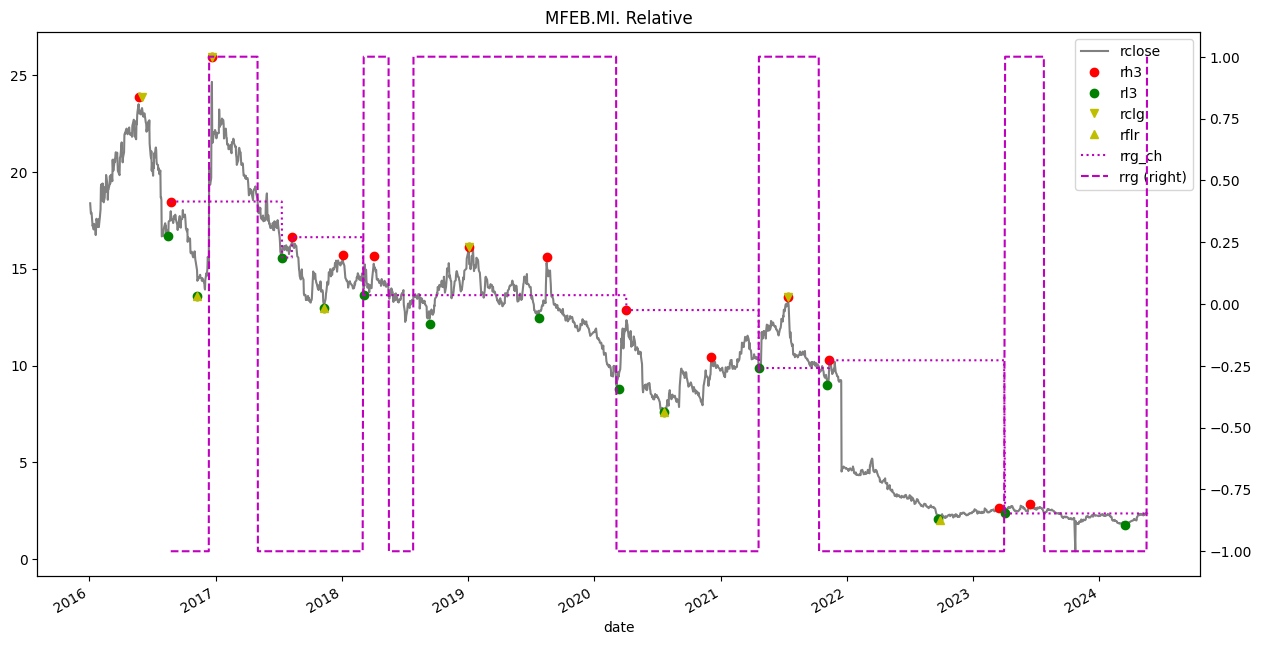

In [9]:
plot_signal_rel(df_fc, ticker)

1
1


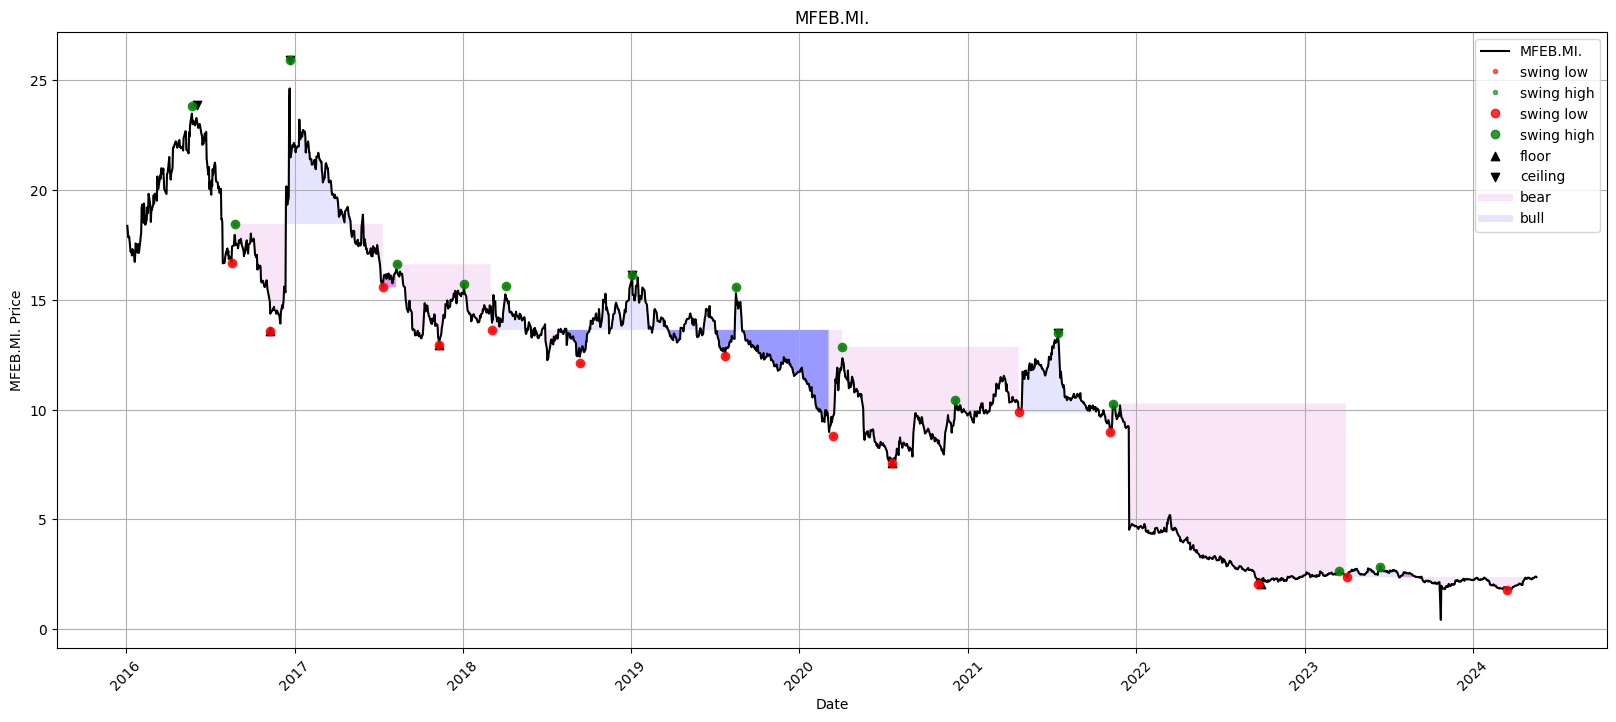

In [10]:
plot_regime_rel(df_fc, ticker)

In [11]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [12]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [13]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [14]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                4.042      3.504  2.749347
ema                     4.042      3.504 -0.437196
floor_ceiling           4.040      3.500  5.307320
floor_ceiling_relative  4.040      3.500  1.072846
sma                     4.042      3.504 -0.823936
turtle                  4.042      3.504  1.707177

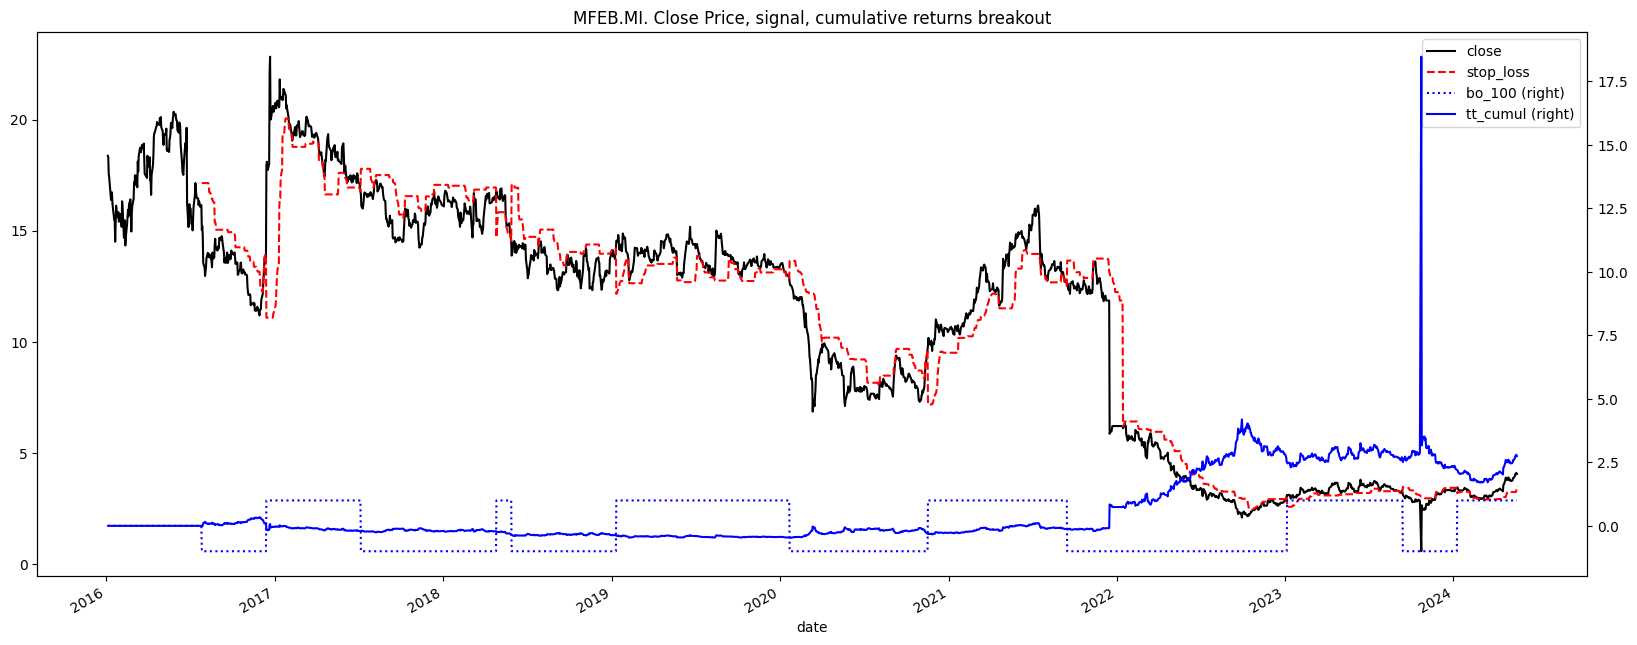

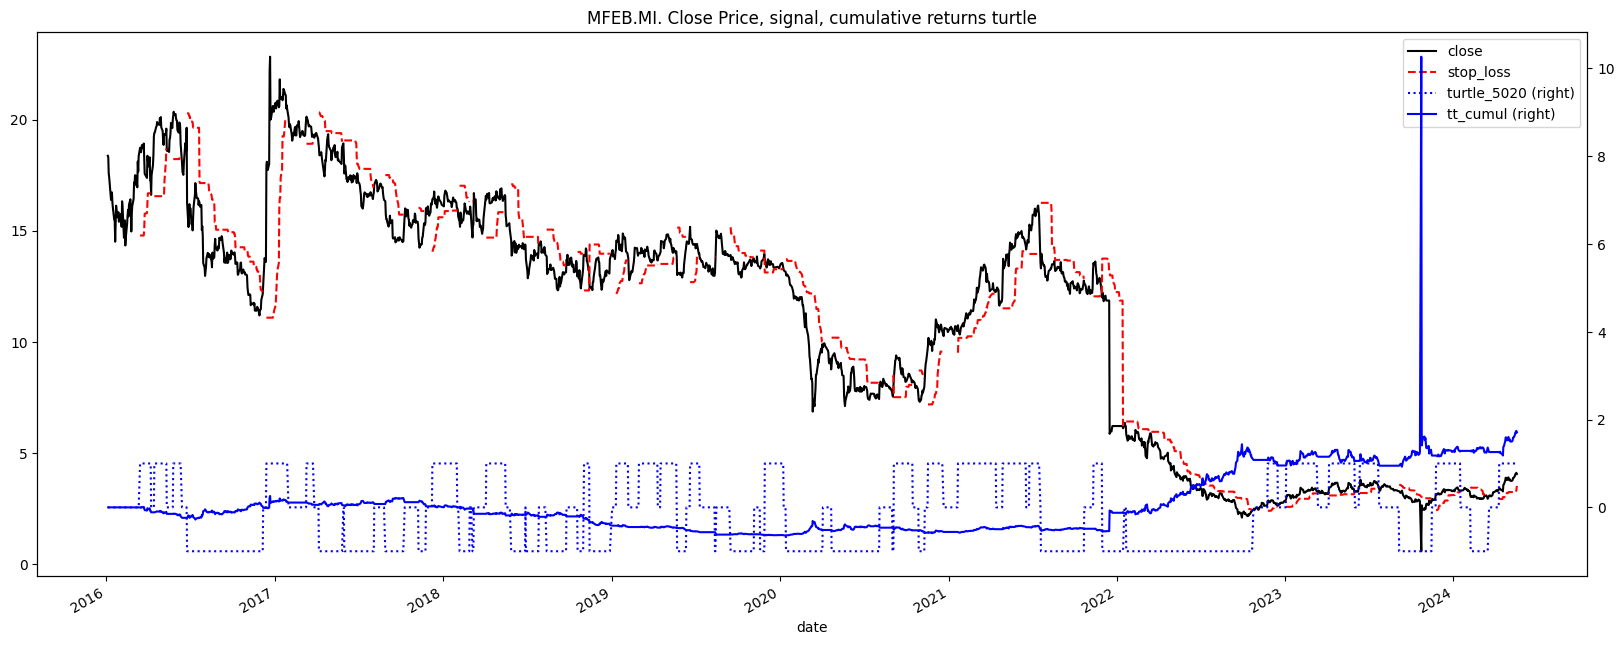

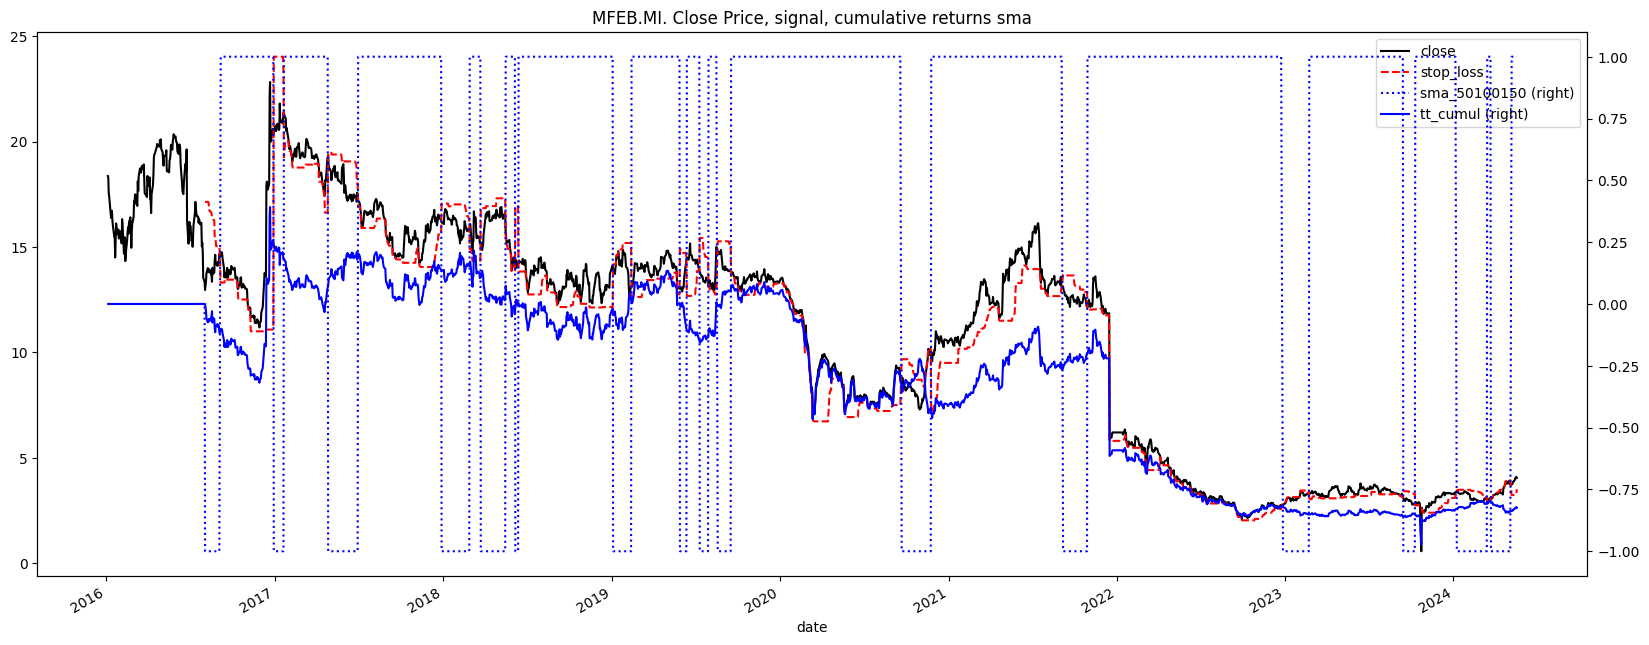

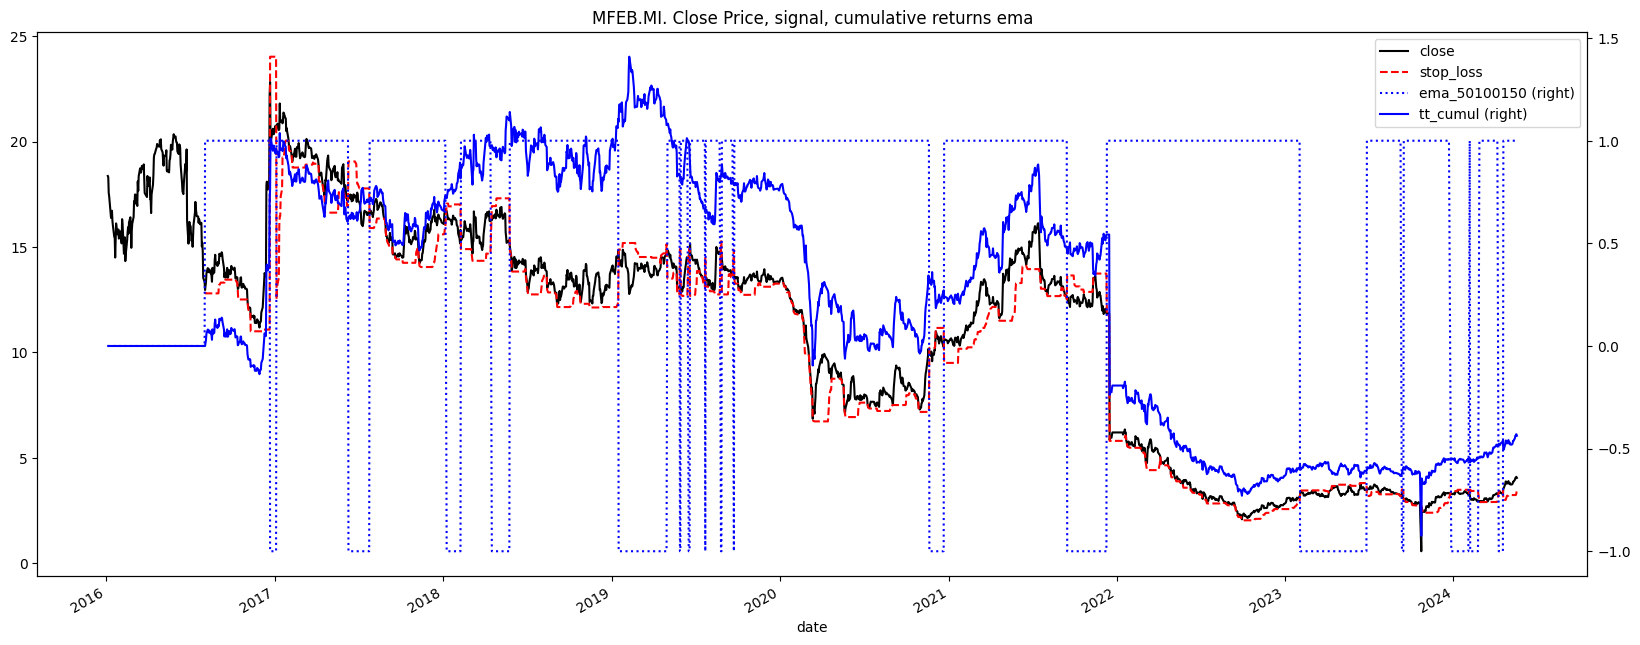

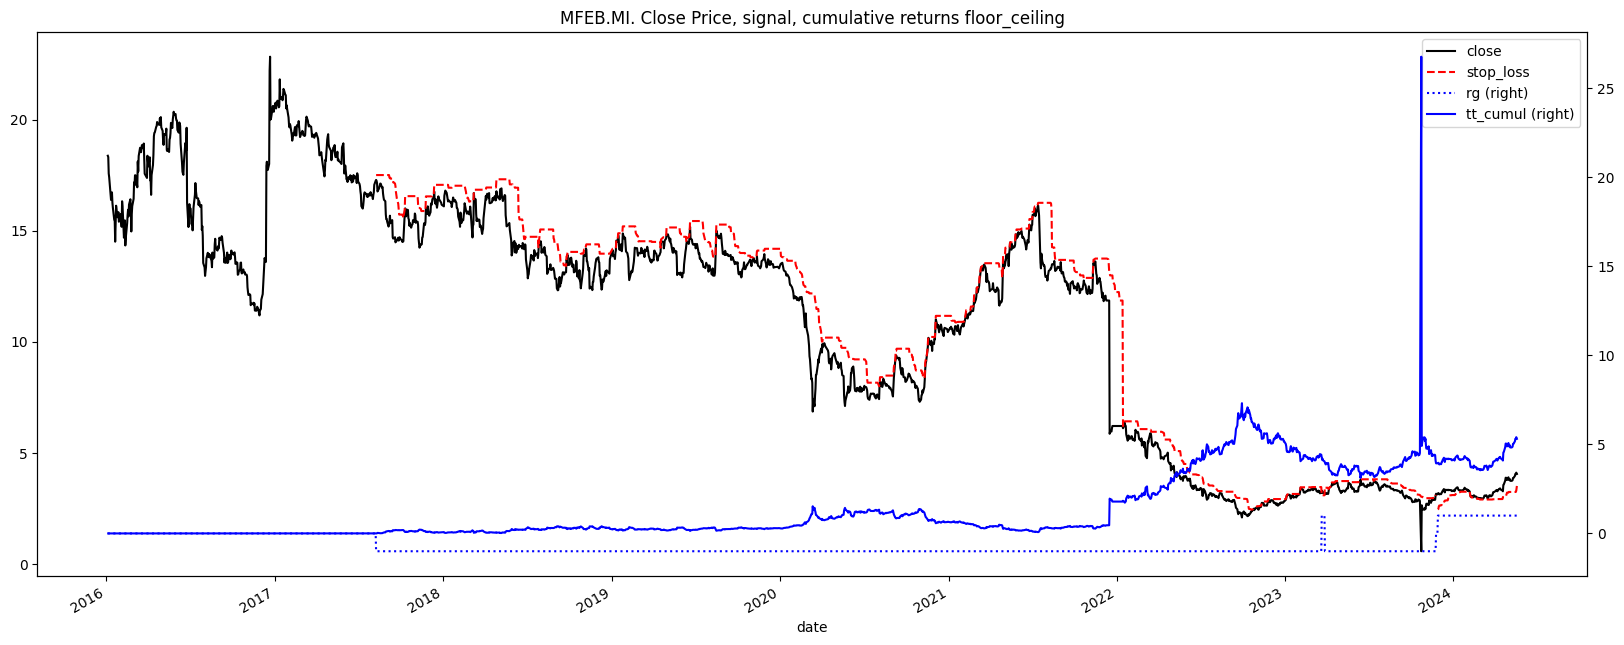

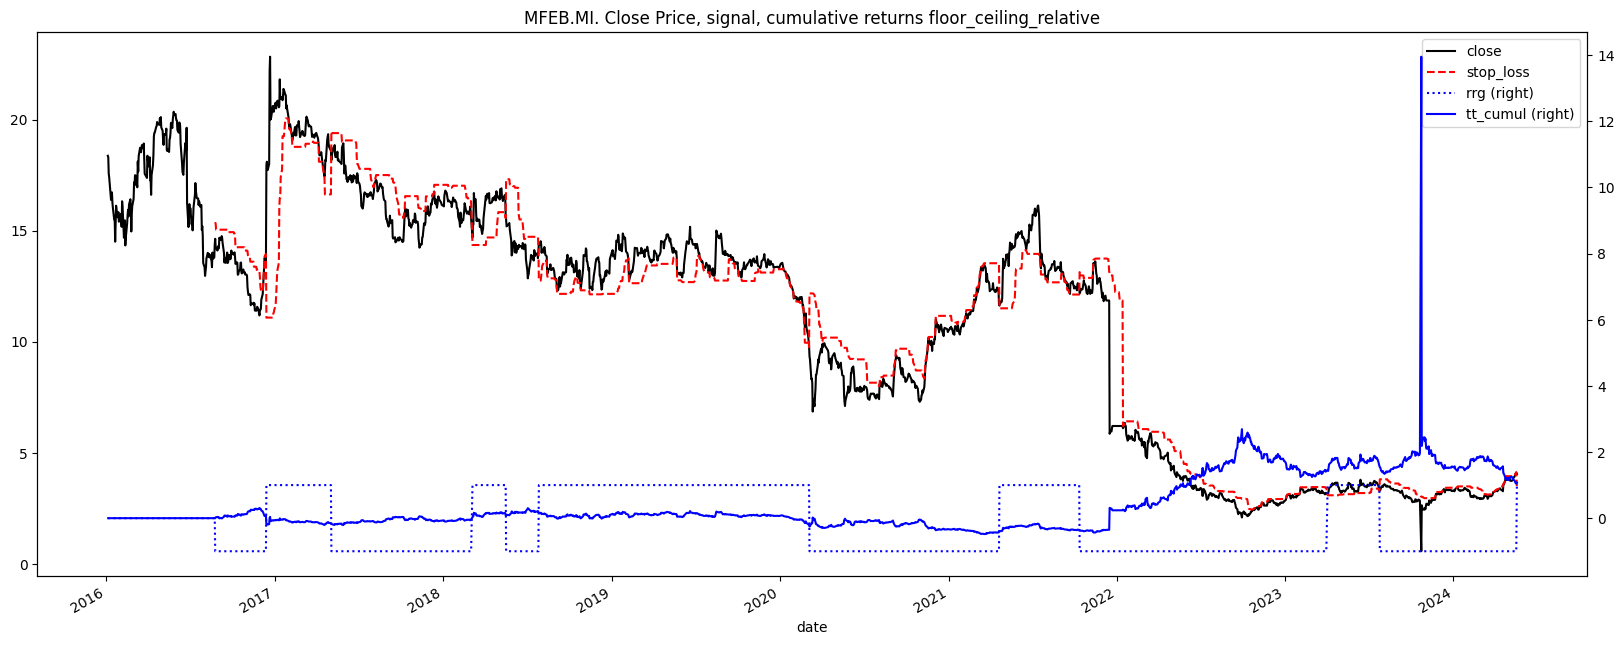

In [15]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

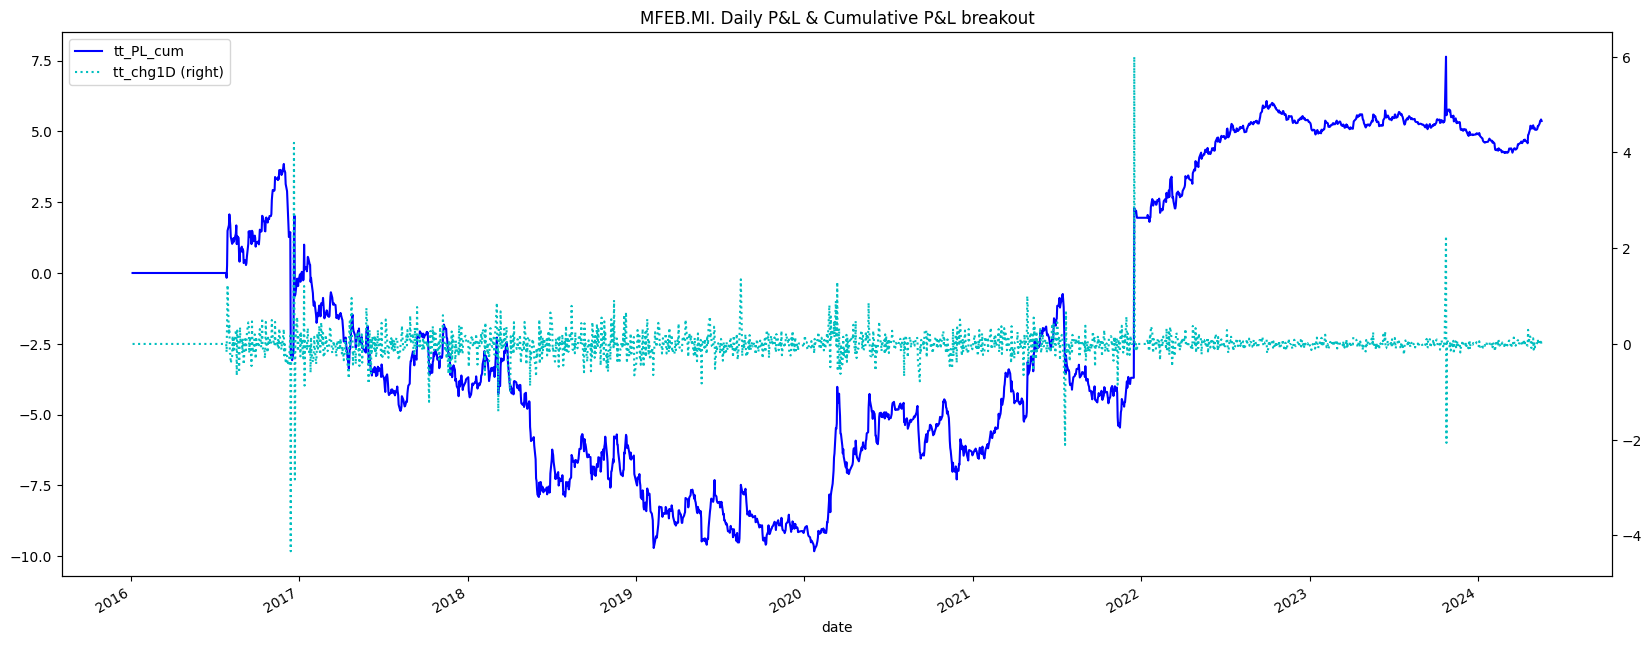

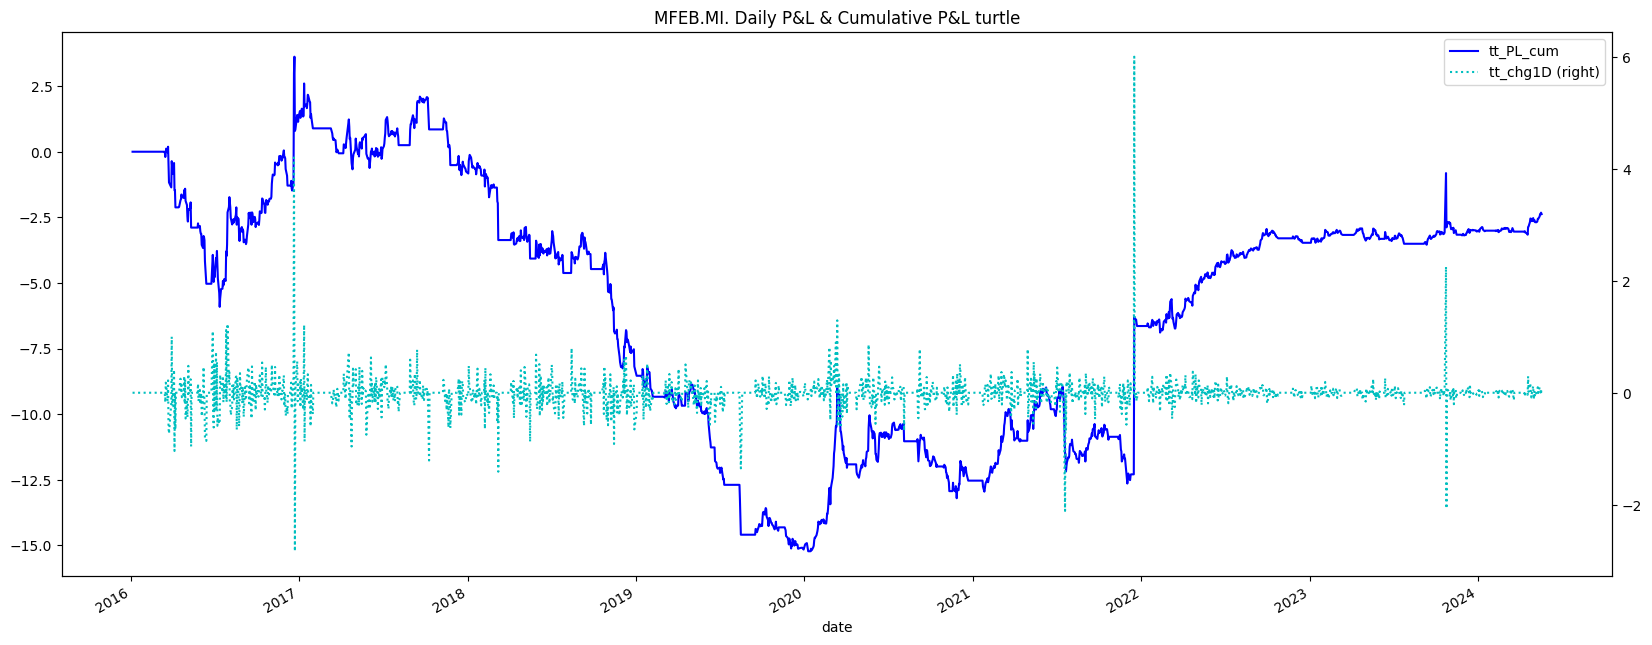

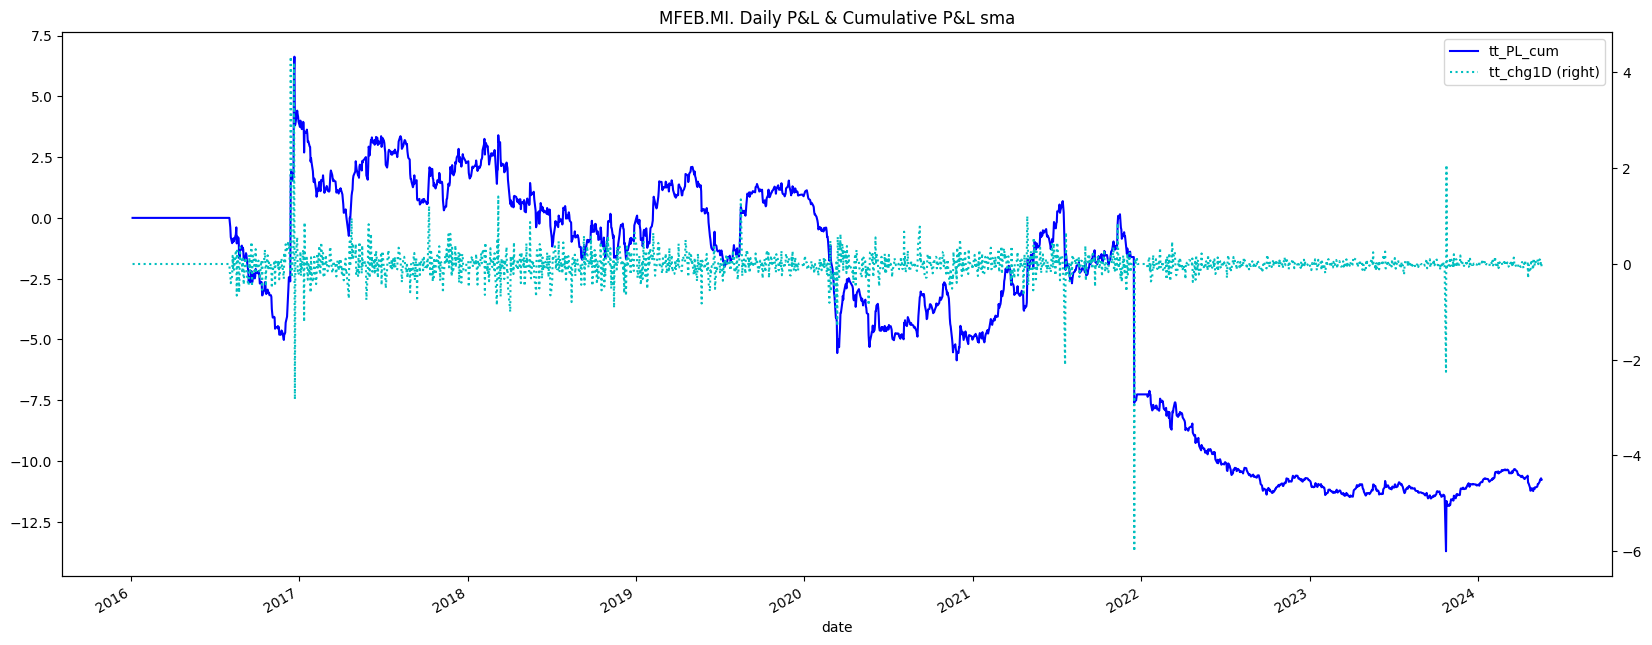

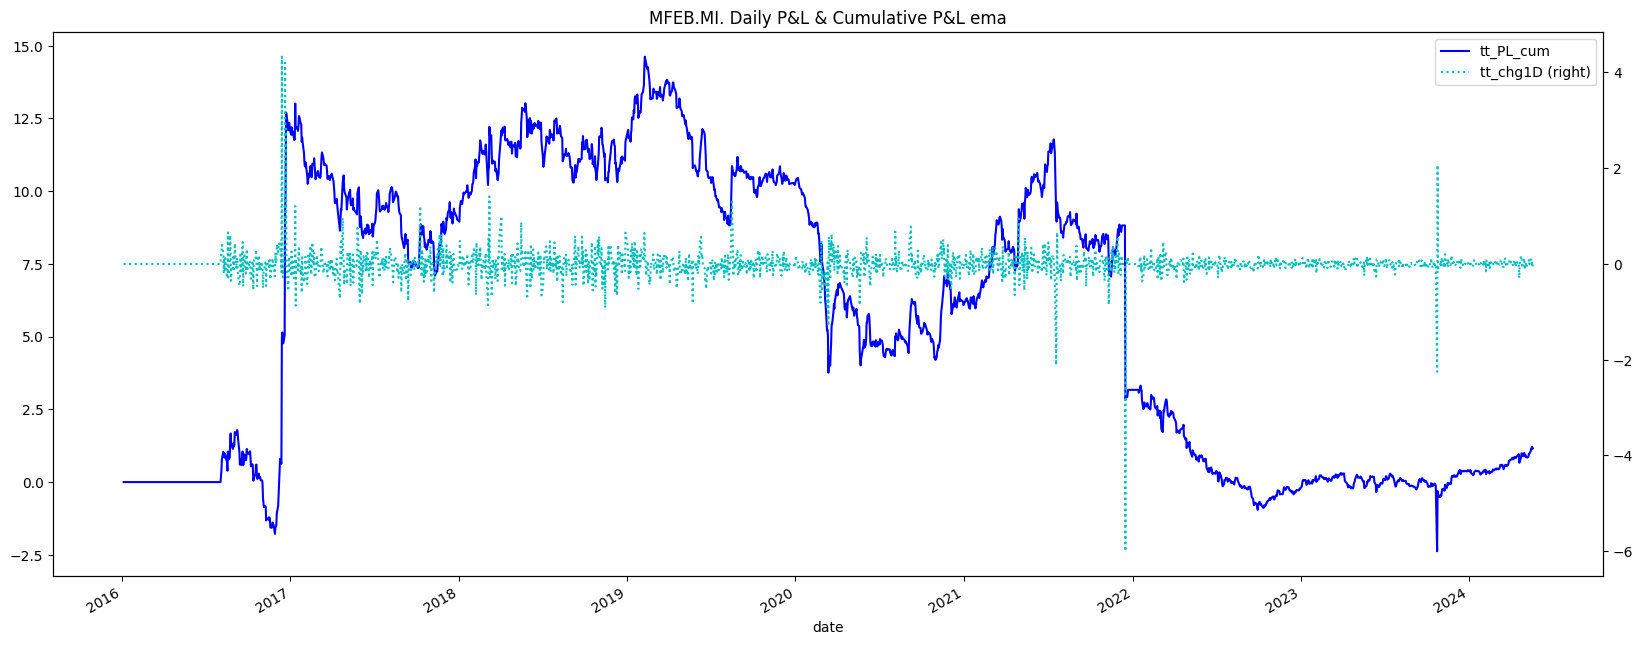

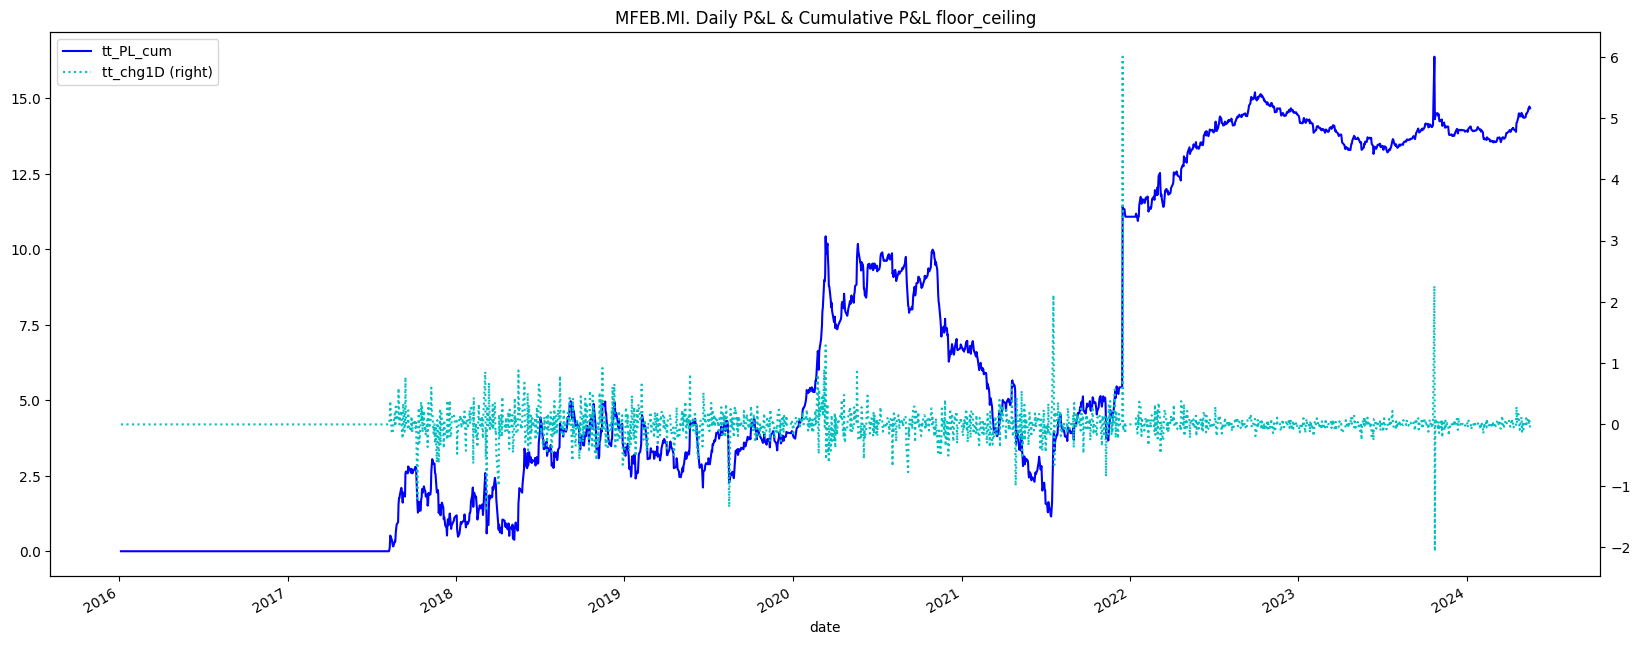

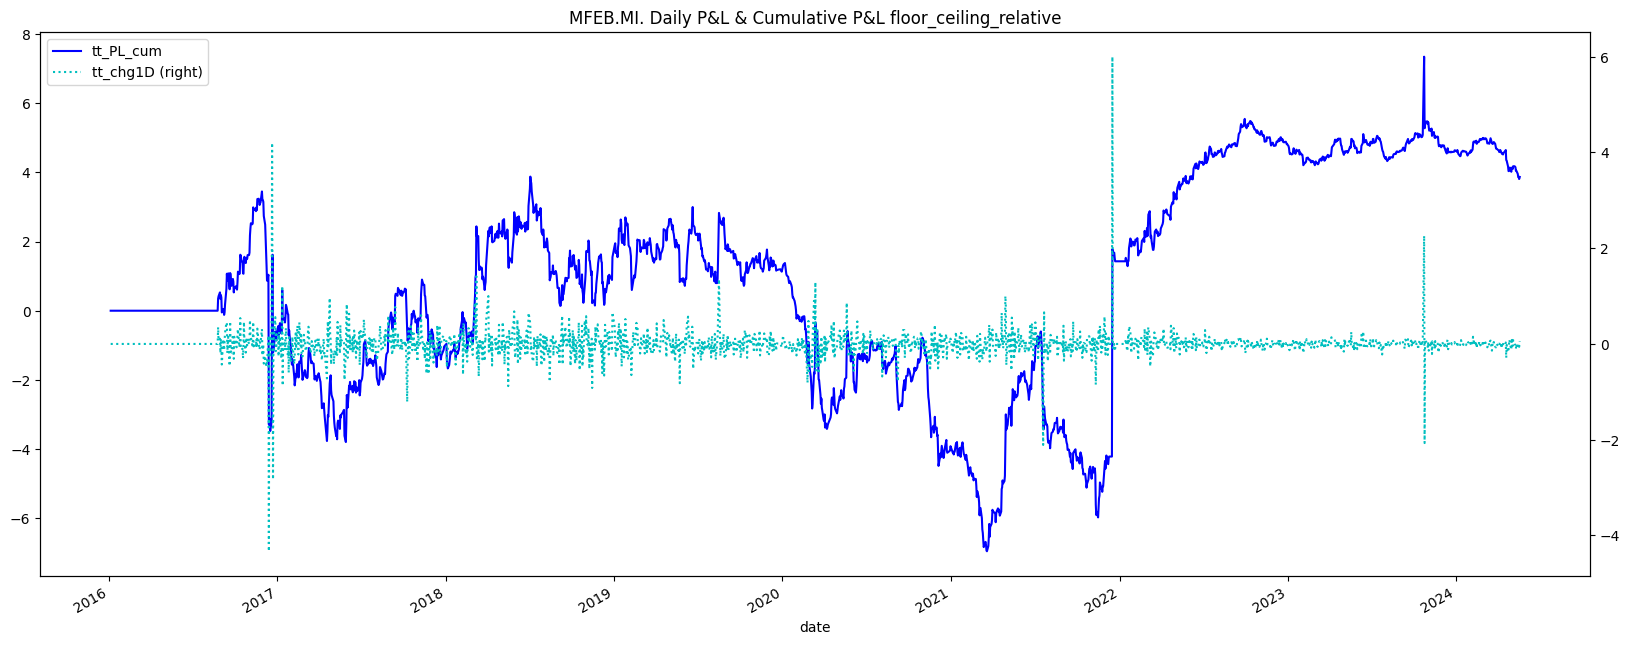

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [17]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy       kelly
method                                                                
breakout                    0.000623              0.000602   14.470711
ema                         0.002212              0.002191   52.519627
floor_ceiling               0.001926              0.001904   44.691904
floor_ceiling_relative     -0.000864             -0.000886  -20.040426
sma                         0.000933              0.000911   21.501110
turtle                      0.002261              0.002251  101.823664

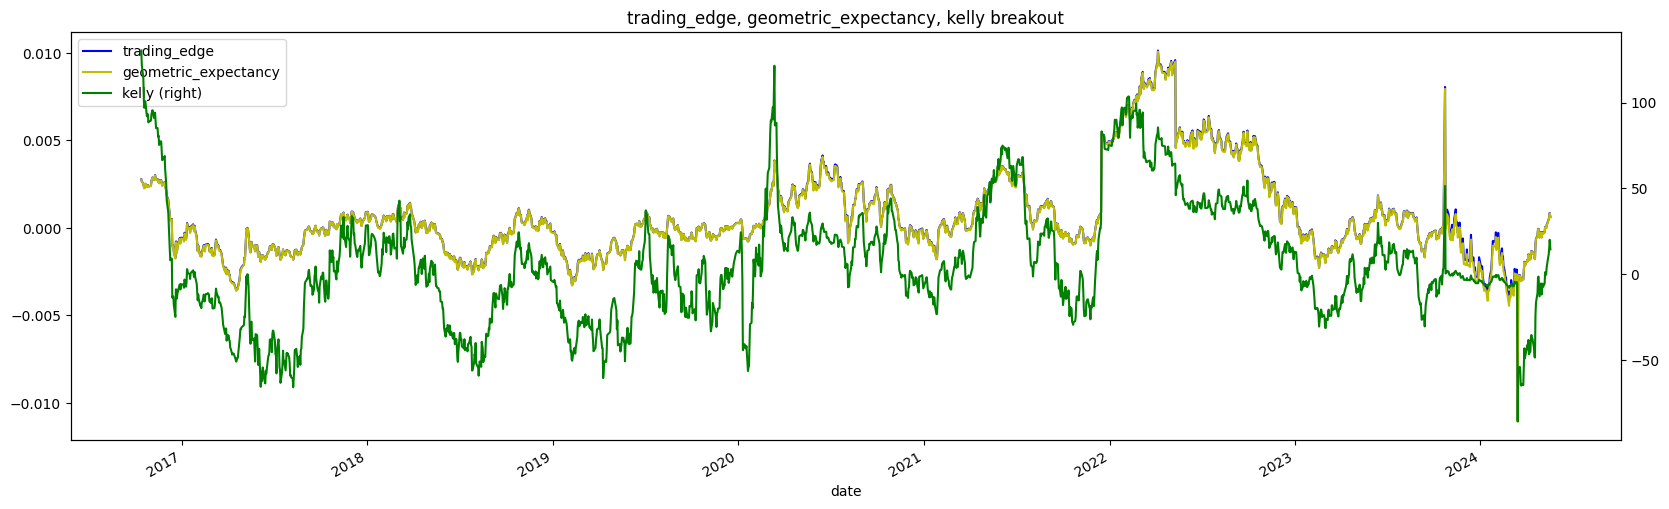

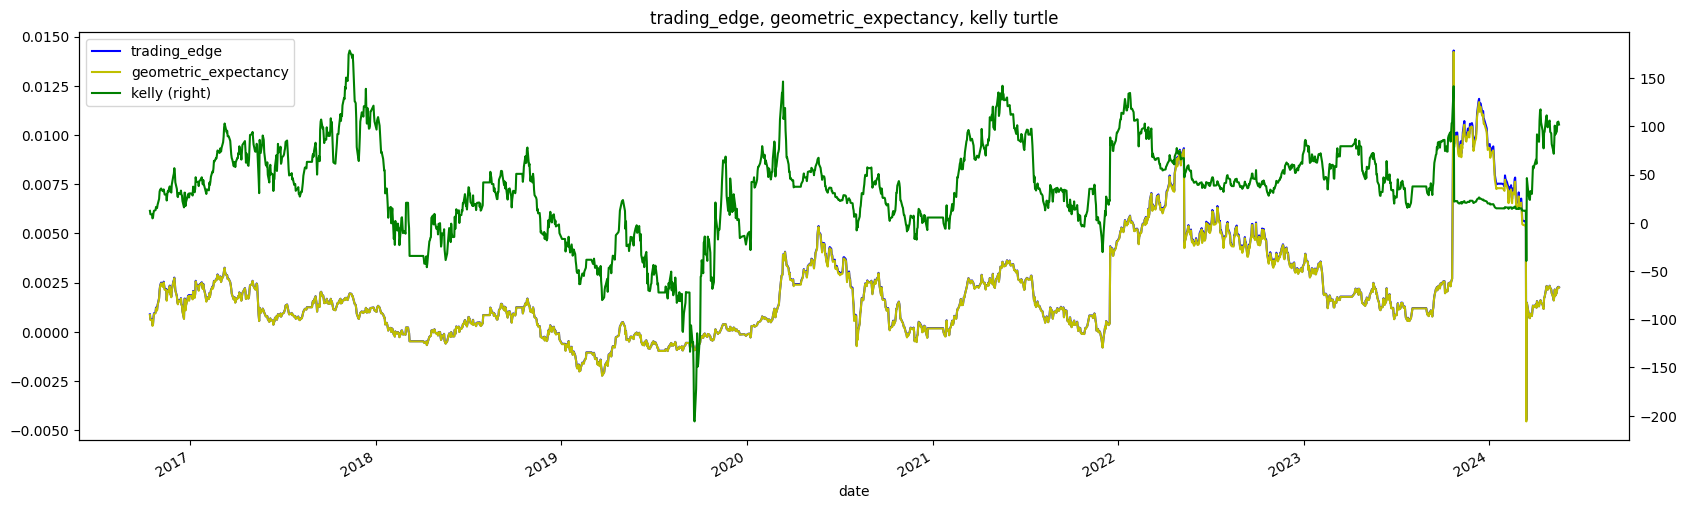

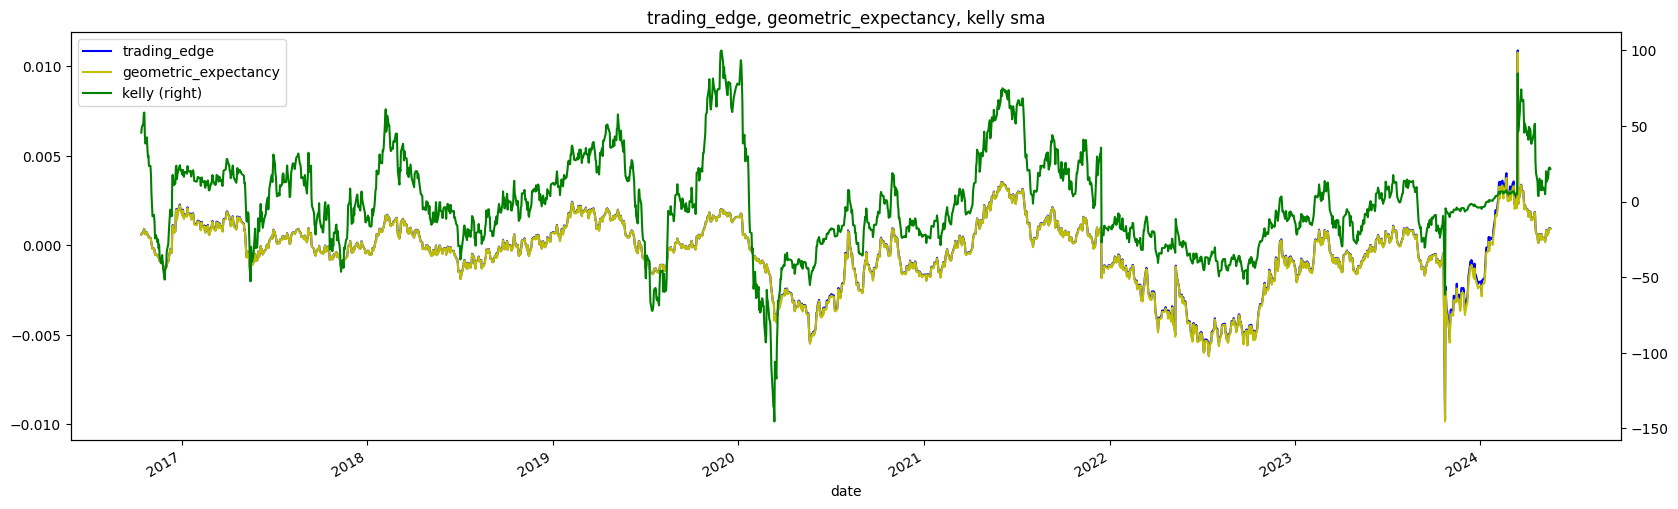

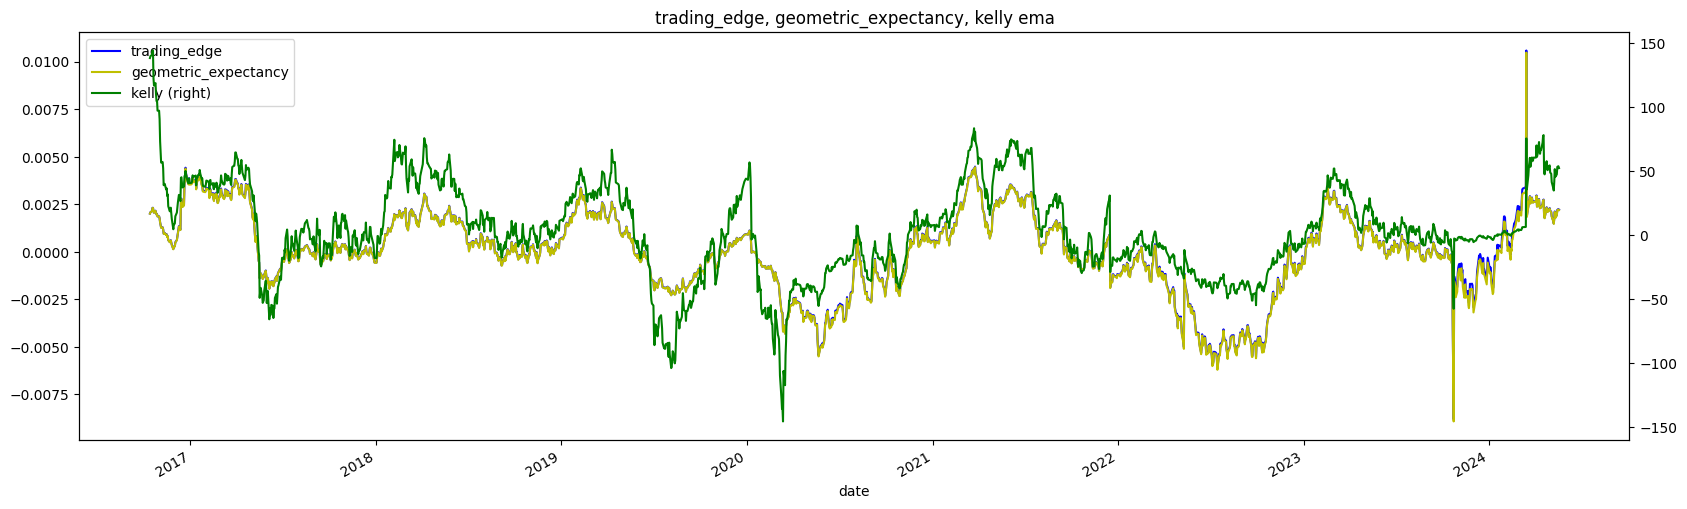

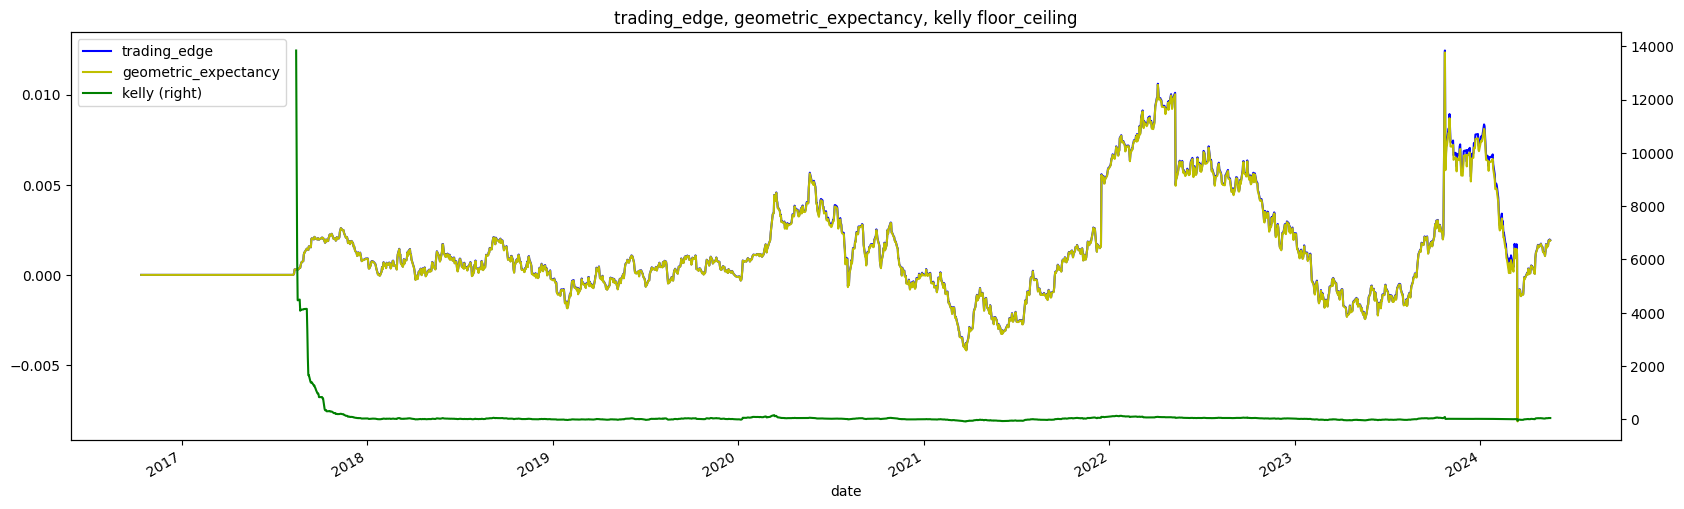

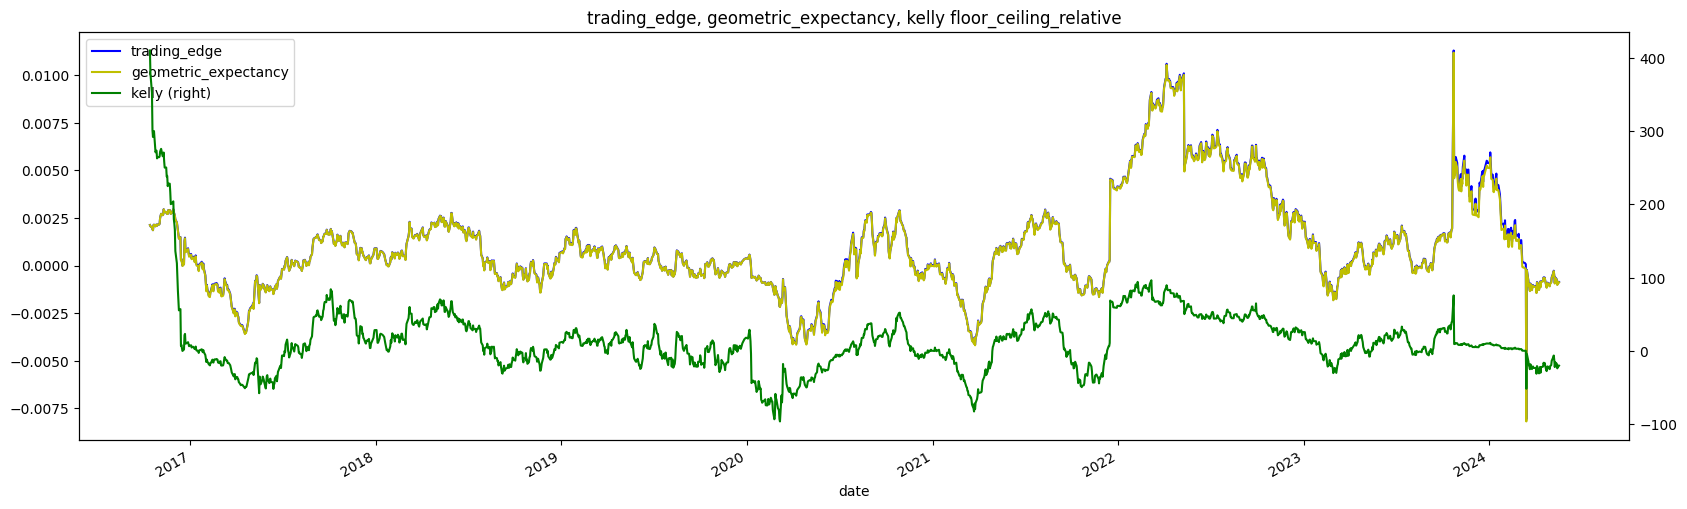

In [18]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [19]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [20]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                 98389.900541   97853.200722   97853.200722   
ema                     104743.710041  107173.415184  107173.415184   
floor_ceiling            68635.000000   51823.000000   51823.000000   
floor_ceiling_relative   97291.000000   96130.000000   96130.000000   
sma                     102153.199196  102153.199196  102153.199196   
turtle                   96651.101589   95424.152040   94972.101879   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                101610.099459      5.366998  
ema                     100347.100735      1.157002  
floor_ceiling           104166.000000     14.670000  
floor_ceiling_relative  101161.000000      3.870000  
sma                      96770.201206    -10.765996  
turtle                  102292.599273     -2.375502

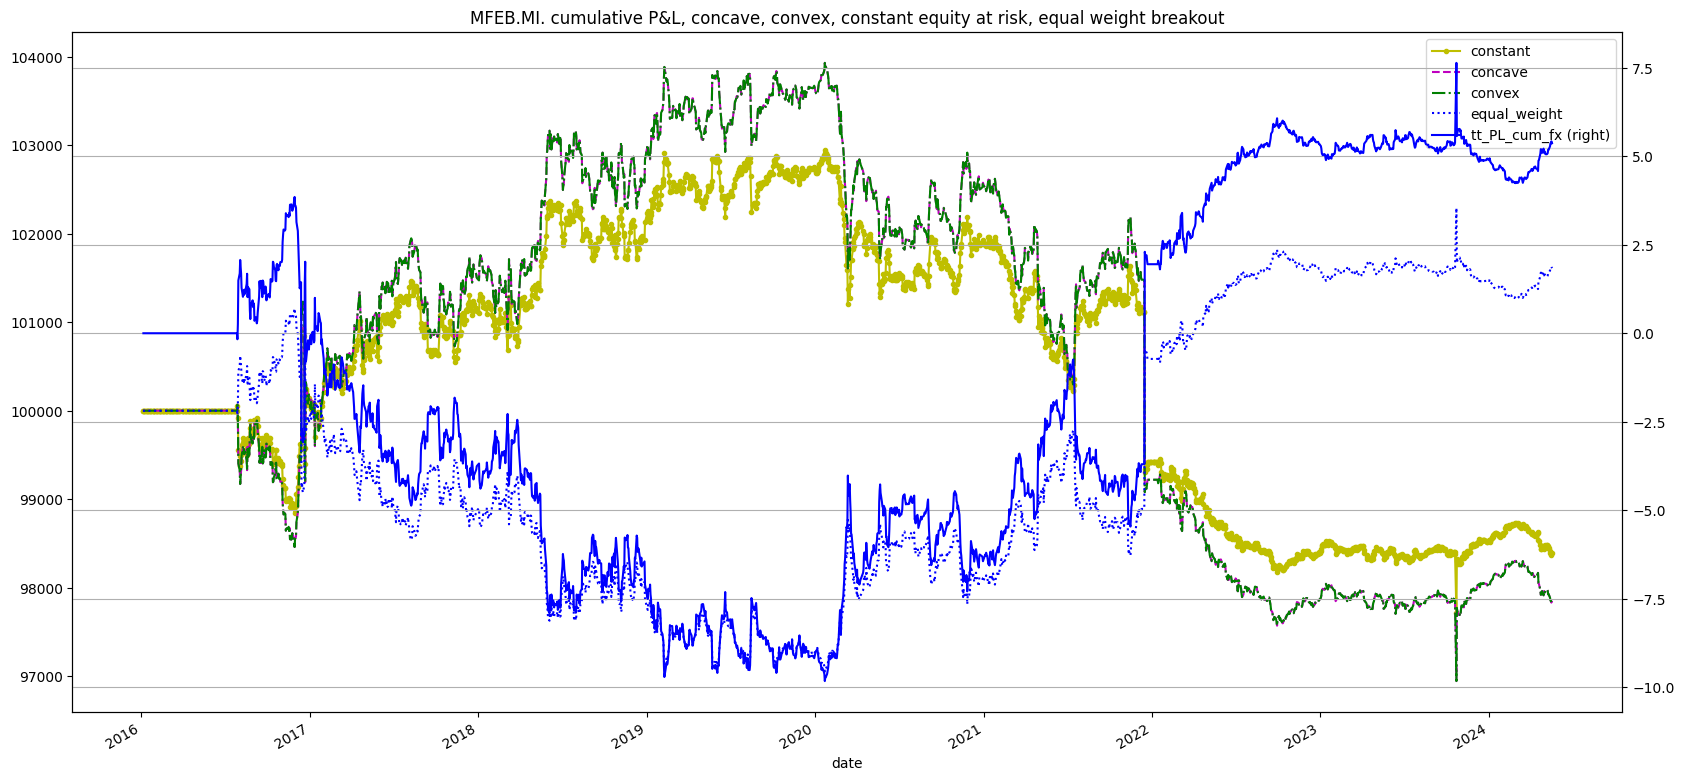

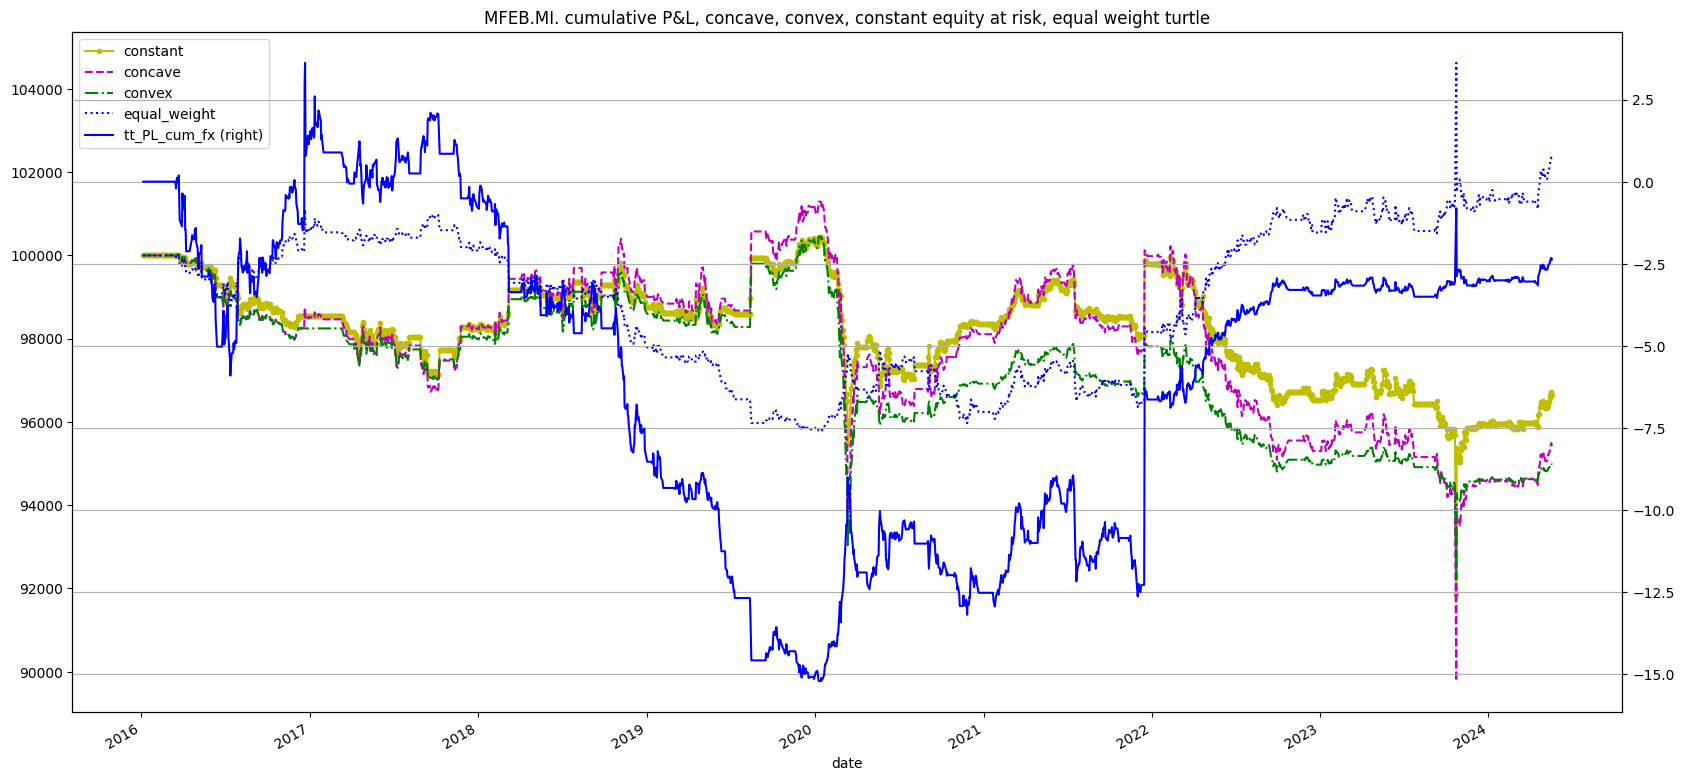

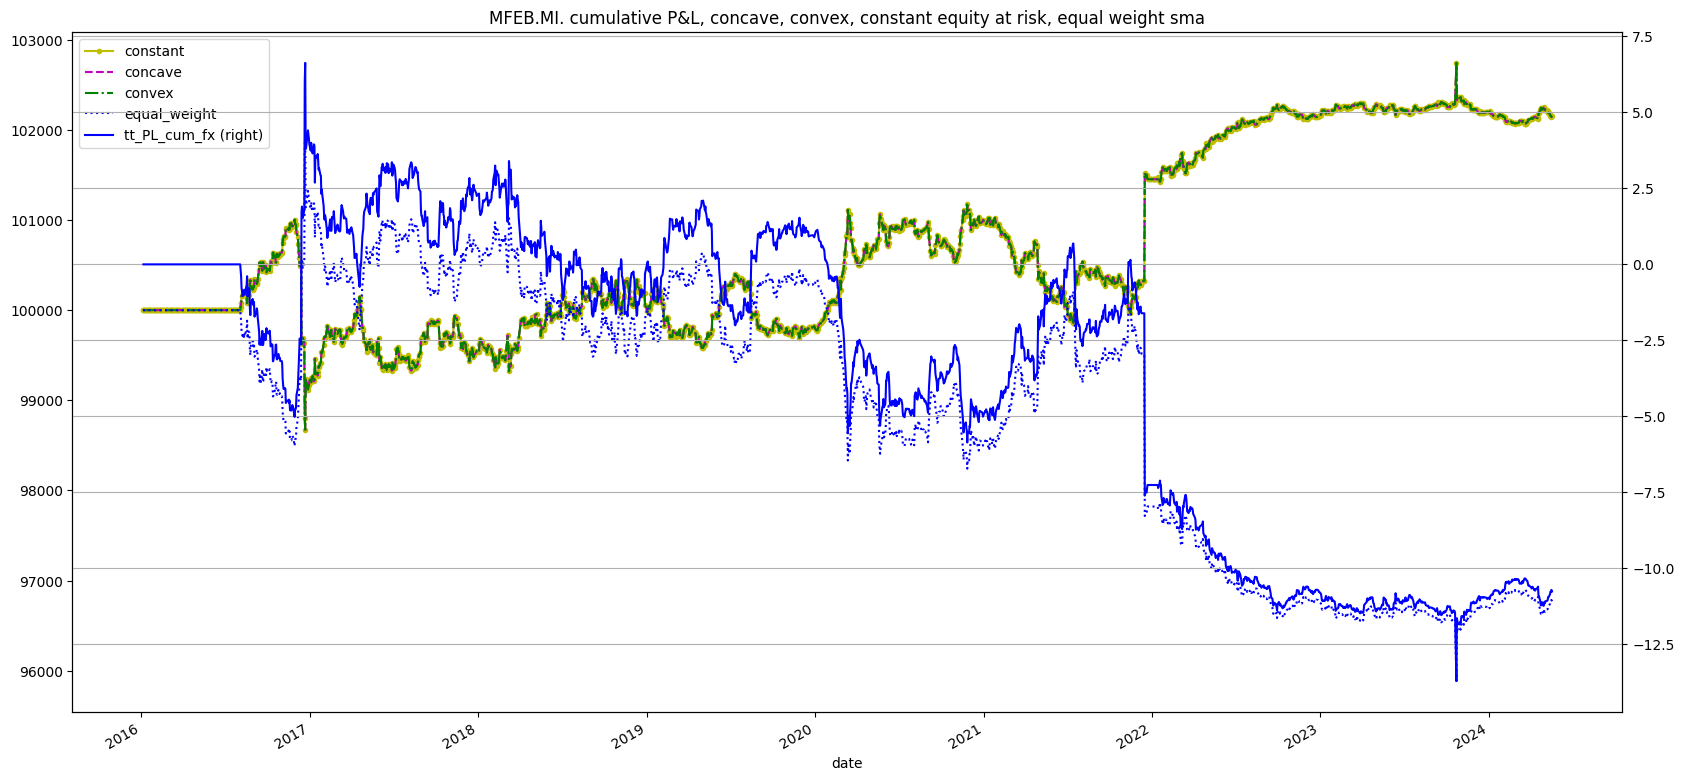

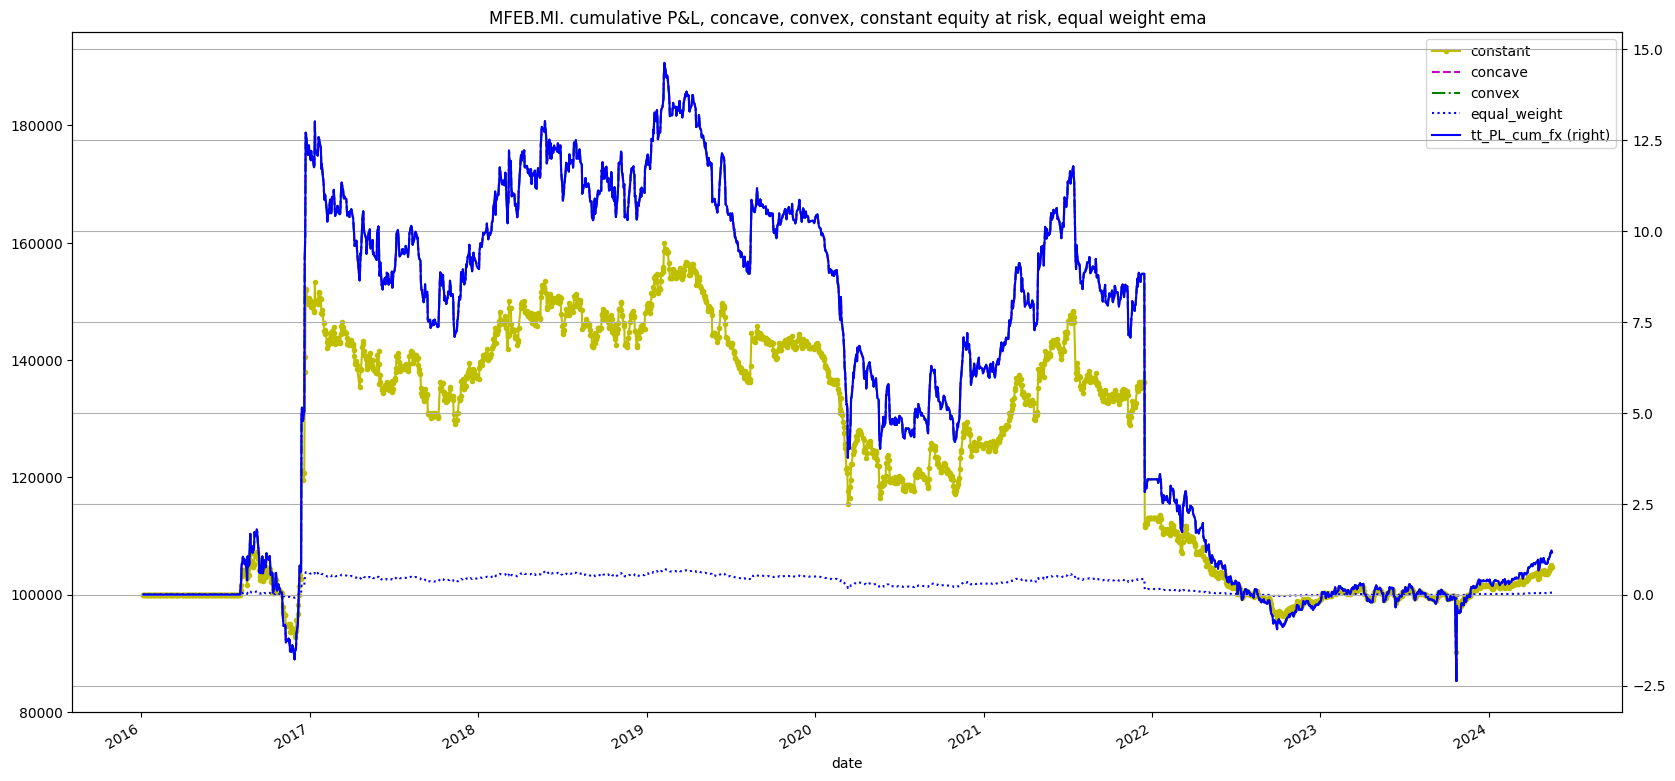

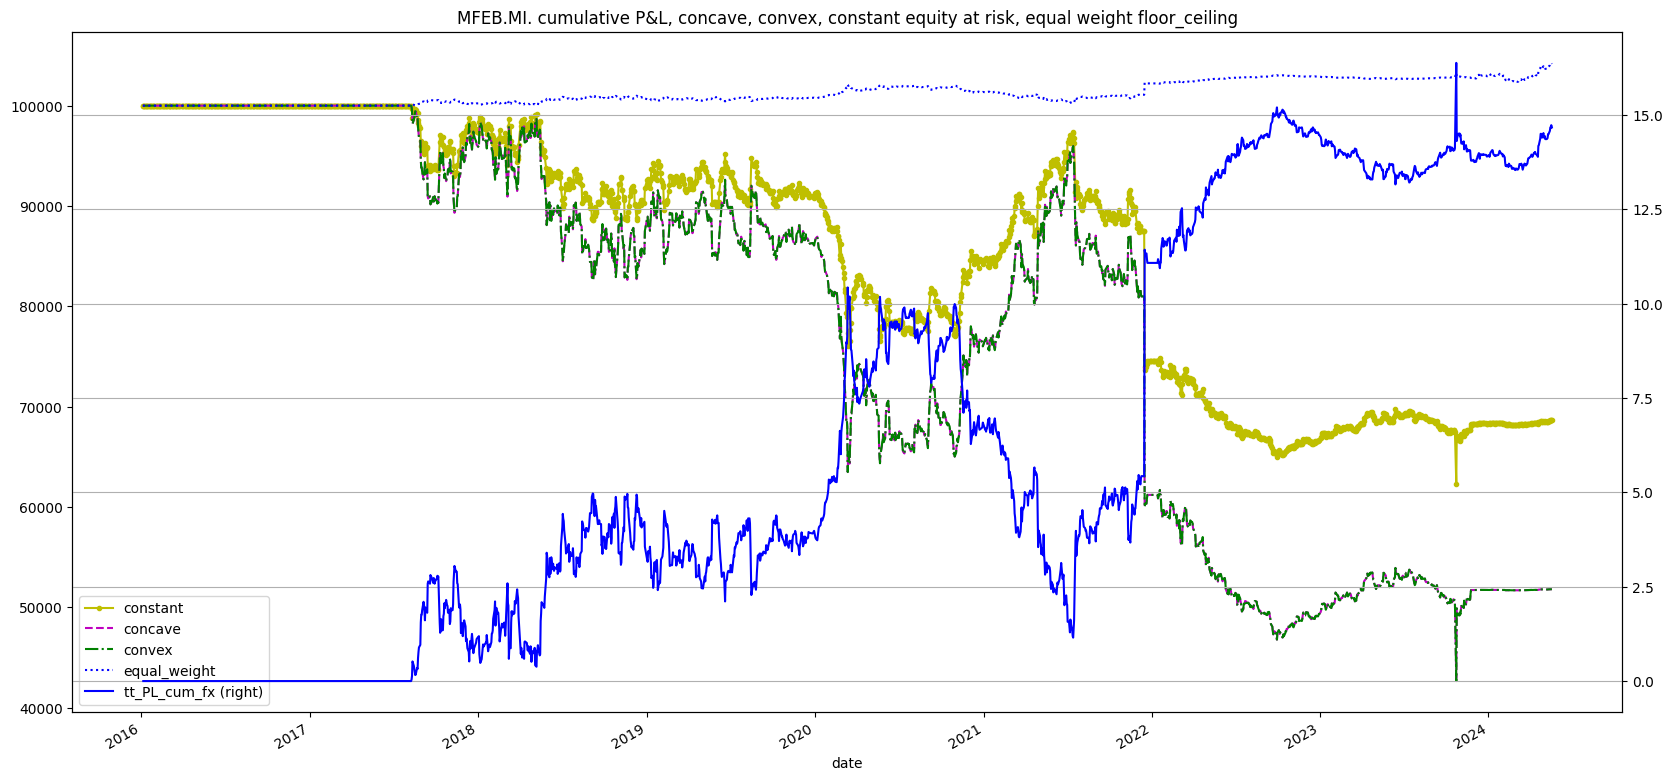

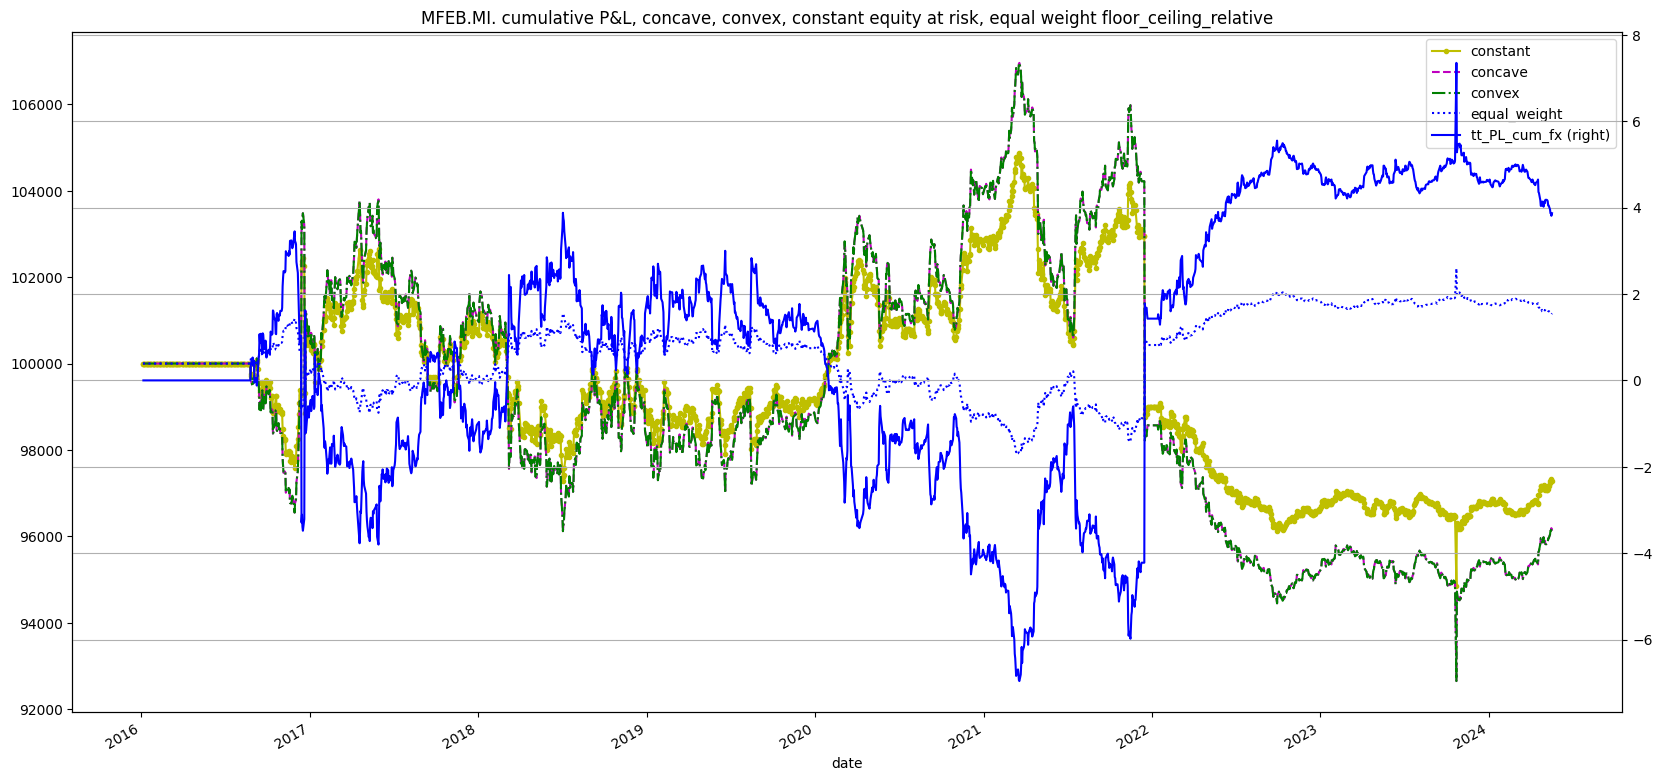

In [23]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [24]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                -1200.0   -300.0   -400.0   -400.0
ema                     -1200.0   4100.0   6200.0   6200.0
floor_ceiling           -1200.0    400.0    100.0    100.0
floor_ceiling_relative  -1200.0   -700.0  -1000.0  -1000.0
sma                     -1100.0   -200.0   -200.0   -200.0
turtle                  -1200.0   1000.0   1200.0    500.0

In [25]:
df_fc.columns

Index(['date', 'volume', 'high', 'low', 'open', 'close', 'adj_close', 'ticker',
       'ropen', 'rhigh', 'rlow', 'rclose', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3',
       'lo3', 'hi4', 'lo4', 'rg', 'flr', 'clg', 'rg_ch', 'rh1', 'rl1', 'rh2',
       'rl2', 'rh3', 'rl3', 'rh4', 'rl4', 'rrt', 'rrg', 'rflr', 'rclg',
       'rrg_ch'],
      dtype='object')

In [26]:
df_fc[df_fc['clg'].notna()][['date', 'clg']].tail(1)

date    clg
1404 2021-07-14 07:00:00  16.25

In [27]:

df_fc[df_fc['flr'].notna()][['date', 'flr']].tail(1)

date   flr
1715 2022-09-29 07:00:00  2.03

In [28]:

df_fc[df_fc['hi3'].notna()][['date', 'hi3']].tail(1)

date   hi3
2129 2024-05-16 07:00:00  4.12

In [29]:
df_fc[df_fc['lo3'].notna()][['date', 'lo3']].tail(1)

date  lo3
2080 2024-03-05 08:00:00  2.9

In [30]:

price = 2.021
stop_loss = 1.61
qty = 1000
r_multiplier = 1.1
r_multiplier
pt = target_price(price, stop_loss, r_multiplier)
exit_qty = partial_exit(qty, r_multiplier)
print('target price', pt,'exit_quantity',exit_qty)

target price 2.4730999999999996 exit_quantity 909.090909090909


In [31]:
cost = 1.8945
price = cost * 1.08
qty * (cost - stop_loss) / (price - stop_loss)

652.4331514011832

In [32]:
average_true_range(df_fc,'high','low','close', n= 63)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2126    0.087619
2127    0.088254
2128    0.088254
2129    0.087937
2130    0.087460
Length: 2131, dtype: float64

In [33]:
df_fc.tail()

date  volume  high   low  open  close  adj_close   ticker  \
2126 2024-05-13 07:00:00  423295  3.95  3.85  3.85   3.95       3.95  MFEB.MI   
2127 2024-05-14 07:00:00  546693  4.05  3.95  3.95   4.04       4.04  MFEB.MI   
2128 2024-05-15 07:00:00  248541  4.08  4.00  4.05   4.04       4.04  MFEB.MI   
2129 2024-05-16 07:00:00  319181  4.12  3.98  4.01   4.10       4.10  MFEB.MI   
2130 2024-05-17 15:35:23  200703  4.12  4.05  4.12   4.04       4.04  MFEB.MI   

      ropen  rhigh  ...  rl2  rh3  rl3  rh4  rl4  rrt  rrg  rflr  rclg  rrg_ch  
2126   2.29   2.35  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    2.37  
2127   2.33   2.39  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    2.37  
2128   2.38   2.39  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    2.37  
2129   2.35   2.42  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    2.37  
2130   2.41   2.41  ...  NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN    2.37  

[5 rows x 37 columns]